## Introducción y Configuración Inicial

##### 🔍 ¿Qué es un Grafo?

Un grafo es una estructura matemática que modela relaciones entre objetos. Se define como:

- Nodos (Vértices): Los puntos que representan las entidades del sistema.

- Aristas (Bordes): Las conexiones entre esos puntos.

Formalmente, un grafo se define como $𝐺 = (𝑉,𝐸)$ donde:

- $V$ es el conjunto de nodos.

- $E$ es el conjunto de aristas, que conectan pares de nodos.

**📌 Tipos de Grafos:**

- Grafo No Dirigido: Las aristas no tienen dirección (como una red de carreteras).

- Grafo Dirigido: Las aristas tienen una dirección (como una red de tránsito unidireccional).

- Grafo Ponderado: Cada arista tiene un peso o valor asociado.

- Grafo No Ponderado: Todas las aristas tienen el mismo peso.

**📌 Grado de un Nodo**

El grado de un nodo es la cantidad de aristas que están conectadas a él. Dependiendo del tipo de grafo:

**En un Grafo No Dirigido:**

- El grado es simplemente el número de conexiones de ese nodo.

**En un Grafo Dirigido:**
- Grado de Entrada (In-Degree): Número de aristas que llegan al nodo.

- Grado de Salida (Out-Degree): Número de aristas que salen del nodo.

**Ejemplo Visual:**

Si el nodo A tiene tres aristas que llegan a él y dos que salen, su:

Grado de Entrada (In-Degree) = 3.

Grado de Salida (Out-Degree) = 2.



**📌 Distribución del Grado**

La distribución del grado nos muestra cómo están distribuidas las conexiones entre los nodos.

Es común que en muchos grafos reales, unos pocos nodos tengan muchas conexiones (hubs), mientras que la mayoría de los nodos tienen pocas conexiones.

En un grafo de carreteras (como el nuestro), esto puede reflejar:

- Algunas intersecciones muy conectadas (autopistas).

- Muchas intersecciones pequeñas (calles locales).



**📌 Conectividad del Grafo**

La conectividad mide si existe un camino entre cada par de nodos.

En un grafo no dirigido, esto se llama conexo si cualquier nodo puede llegar a cualquier otro nodo.

En un grafo dirigido, tenemos dos tipos de conectividad:

- Conectividad Débil: Si ignoramos las direcciones, todos los nodos están conectados.

- Conectividad Fuerte: Todos los nodos pueden llegar a todos los demás respetando las direcciones.

**Nuestro Caso:**

El grafo roadNet-CA es débilmente conexo (weakly connected). Esto significa que:

- Si ignoramos las direcciones de las carreteras, todas las intersecciones están conectadas.

- Pero si respetamos las direcciones, algunas intersecciones podrían no ser accesibles desde otras.


**📌 Densidad del Grafo**

La densidad de un grafo es una medida que nos indica qué tan "completo" está el grafo.

**Interpretación:**

- Una densidad cercana a 0 significa que el grafo es muy disperso (pocas conexiones).

- Una densidad cercana a 1 significa que el grafo es muy denso (muchas conexiones).

**Nuestro Caso:**

Como es un grafo de carreteras, esperamos una baja densidad, ya que no todas las intersecciones están conectadas directamente entre sí.


**📌 Nodos más importantes (Hubs)**

- Los hubs son nodos con muchas conexiones.

- En un grafo de carreteras, estos representan intersecciones importantes (grandes autopistas, cruces centrales).

- Identificar estos nodos es clave para entender la estructura del grafo y optimizarlo (por ejemplo, para el tráfico).


**📌 ¿Por qué son importantes estos conceptos?**

- Te permiten comprender la estructura del grafo.

- Identificar patrones (como hubs) que son cruciales para la optimización.

- Entender la distribución del grado es clave para modelos avanzados (como GNNs) porque afecta cómo fluye la información.

- La conectividad te dice si el grafo es navegable.

- La densidad ayuda a determinar la eficiencia de las conexiones.


##### 📌 ¿Qué es el Dataset roadNet-CA?

El dataset roadNet-CA es un grafo que representa las carreteras de California, en el que:

- Cada nodo es una intersección.

- Cada arista representa una conexión entre intersecciones.

**Es un grafo dirigido y no ponderado, donde las conexiones tienen una dirección.**

##### Instalación de dependencias necesarias (Colab)

Primero, necesitamos instalar las librerías necesarias:

- networkx para trabajar con grafos.

- matplotlib para visualización.

- torch y torch-geometric para futuras implementaciones de GNN.

In [1]:
!pip install networkx matplotlib torch torch-geometric -U --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/

## Descargar y Cargar el Dataset roadNet-CA

Descomprimiendo el dataset...
Archivo descomprimido.
Cargando el grafo en NetworkX...
Grafo cargado con 1965206 nodos y 5533214 aristas.


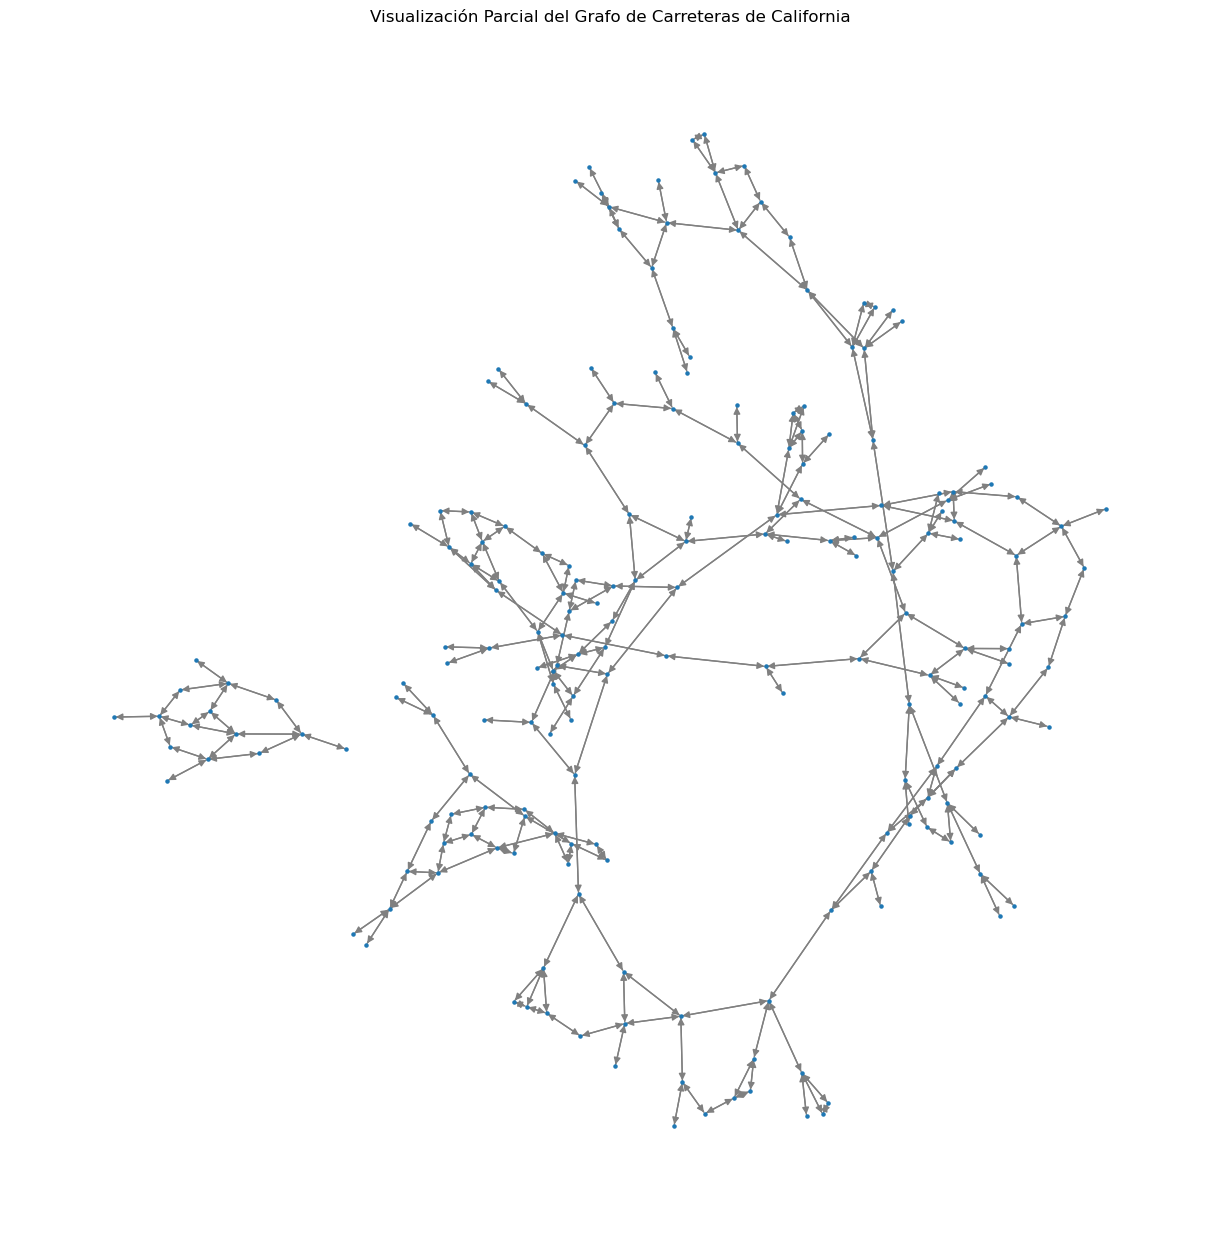

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip
import os

# ✅ Store large files outside the notebooks folder
DATA_DIR = os.path.join("..", "data")
os.makedirs(DATA_DIR, exist_ok=True)

# Definir la URL del dataset
dataset_url = "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
dataset_path = os.path.join(DATA_DIR, "roadNet-CA.txt.gz")
raw_txt_path = os.path.join(DATA_DIR, "roadNet-CA.txt")

# Descargar el dataset si no está descargado
if not os.path.exists(dataset_path):
    import urllib.request
    print("Descargando el dataset...")
    urllib.request.urlretrieve(dataset_url, dataset_path)
    print("Descarga completa.")

# Descomprimir el archivo
print("Descomprimiendo el dataset...")
with gzip.open(dataset_path, 'rb') as f_in:
    with open(raw_txt_path, 'wb') as f_out:
        f_out.write(f_in.read())

print("Archivo descomprimido.")

# Cargar el grafo utilizando NetworkX
print("Cargando el grafo en NetworkX...")
G = nx.read_edgelist(raw_txt_path, comments='#', create_using=nx.DiGraph(), nodetype=int)
print(f"Grafo cargado con {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas.")

# Visualizar una parte del grafo para verificar
plt.figure(figsize=(12, 12))
subgraph = G.subgraph(list(G.nodes())[:200])  # Visualizar solo una parte para evitar sobrecargar la vista
nx.draw(subgraph, node_size=5, edge_color='gray')
plt.title("Visualización Parcial del Grafo roadNet-CA")
plt.show()


**¿Qué hace este código?**

1. Descarga el Dataset: Si no está descargado, lo obtiene de la URL.

2. Descomprime el Archivo: Lo convierte de .gz a .txt.

3. Carga el Grafo: Utiliza NetworkX para leer el grafo directamente desde el archivo.

4. Muestra Información Básica: Imprime el número de nodos y aristas del grafo.

5. Visualiza una Parte del Grafo: Dibuja una pequeña parte del grafo para evitar sobrecargar la vista.

## Explorando el Grafo y Entendiendo su Estructura

**✅ 🔍 ¿Qué queremos explorar?**

- Número total de nodos y aristas.

- Grado de los nodos:

  - Grado de entrada (in-degree) y salida (out-degree) porque es un grafo dirigido.

  - Distribución del grado.

- Conectividad:

  - ¿Es un grafo conexo?

  - ¿Cuántos componentes conexos tiene?

- Densidad del grafo: Nos dice qué tan "completo" está el grafo.

- Nodos más importantes: ¿Cuáles son los nodos con mayor grado (hubs)?



**✅ 🔍 ¿Qué hace este código?**

1. Imprime información básica del grafo: Nodos, aristas, si es dirigido.

2. Calcula el grado de entrada y salida de cada nodo: Muestra el mínimo, máximo y promedio.

3. Visualiza la distribución del grado: Utiliza histogramas para mostrar cómo están distribuidos los grados.

4. Revisa la conectividad del grafo: Verifica si es débilmente conexo.

5. Calcula la densidad del grafo: Nos dice qué tan completo está.

6. Identifica los nodos más importantes: Los nodos con más conexiones de entrada y salida.




🔍 Información del Grafo:
- Número total de nodos: 1965206
- Número total de aristas: 5533214
- Es un grafo dirigido: True

🔍 Grado de Entrada (In-Degree):
- Grado mínimo: 1
- Grado máximo: 12
- Promedio: 2.8155898160294646

🔍 Grado de Salida (Out-Degree):
- Grado mínimo: 1
- Grado máximo: 12
- Promedio: 2.8155898160294646


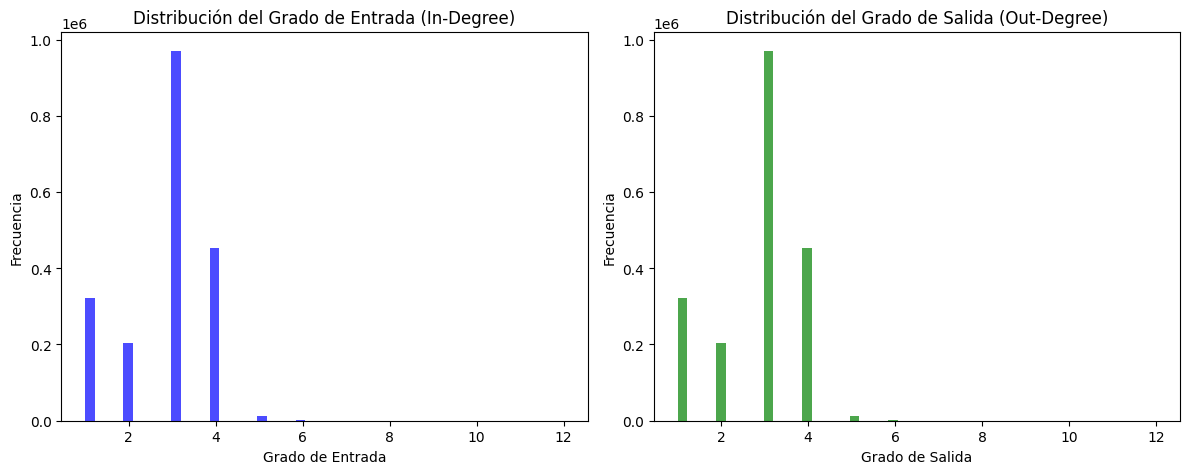


🔍 Conectividad del Grafo:
- El grafo no es débilmente conexo.
- Densidad del Grafo: 0.000001

🔍 Nodos con Mayor Grado de Entrada:
 - Nodo 562818: 12 conexiones de entrada
 - Nodo 534751: 10 conexiones de entrada
 - Nodo 521168: 10 conexiones de entrada
 - Nodo 1795416: 9 conexiones de entrada
 - Nodo 5657: 8 conexiones de entrada

🔍 Nodos con Mayor Grado de Salida:
 - Nodo 562818: 12 conexiones de salida
 - Nodo 534751: 10 conexiones de salida
 - Nodo 521168: 10 conexiones de salida
 - Nodo 1795416: 9 conexiones de salida
 - Nodo 5657: 8 conexiones de salida


In [2]:
# 1. Información Básica del Grafo
print(f"\n🔍 Información del Grafo:")
print(f"- Número total de nodos: {G.number_of_nodes()}")
print(f"- Número total de aristas: {G.number_of_edges()}")
print(f"- Es un grafo dirigido: {G.is_directed()}")

# 2. Grado de Nodos (In-Degree y Out-Degree)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

print(f"\n🔍 Grado de Entrada (In-Degree):")
print(f"- Grado mínimo: {min(in_degrees.values())}")
print(f"- Grado máximo: {max(in_degrees.values())}")
print(f"- Promedio: {sum(in_degrees.values()) / len(in_degrees)}")

print(f"\n🔍 Grado de Salida (Out-Degree):")
print(f"- Grado mínimo: {min(out_degrees.values())}")
print(f"- Grado máximo: {max(out_degrees.values())}")
print(f"- Promedio: {sum(out_degrees.values()) / len(out_degrees)}")

# 3. Distribución del Grado de Entrada y Salida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(list(in_degrees.values()), bins=50, color='blue', alpha=0.7)
plt.title("Distribución del Grado de Entrada (In-Degree)")
plt.xlabel("Grado de Entrada")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(list(out_degrees.values()), bins=50, color='green', alpha=0.7)
plt.title("Distribución del Grado de Salida (Out-Degree)")
plt.xlabel("Grado de Salida")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# 4. Conectividad del Grafo
print("\n🔍 Conectividad del Grafo:")
if nx.is_weakly_connected(G):
    print("- El grafo es débilmente conexo (tiene al menos un componente conexo).")
else:
    print("- El grafo no es débilmente conexo.")

# 5. Densidad del Grafo
density = nx.density(G)
print(f"- Densidad del Grafo: {density:.6f}")

# 6. Nodos más importantes (Hubs)
print("\n🔍 Nodos con Mayor Grado de Entrada:")
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
for node, degree in top_in:
    print(f" - Nodo {node}: {degree} conexiones de entrada")

print("\n🔍 Nodos con Mayor Grado de Salida:")
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
for node, degree in top_out:
    print(f" - Nodo {node}: {degree} conexiones de salida")

## Representación de Grafos

**¿Por qué es importante entender las representaciones de grafos?**

- Las representaciones de grafos son la base para todas las operaciones que realizamos en ellos.

- Dependiendo del tipo de problema y del método que usemos (GNNs, algoritmos clásicos), elegiremos una representación u otra.

Estas son las tres representaciones más importantes:

- Matriz de Adyacencia.

- Lista de Adyacencia.

- Matriz Laplaciana (y Laplaciana Normalizada).



#### Matriz de Adyacencia

Es una matriz cuadrada 𝐴 de tamaño ∣ 𝑉 ∣ × ∣ 𝑉 ∣ donde:

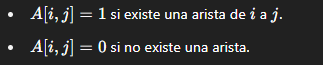

- Para un grafo no dirigido, la matriz es simétrica.

- Para un grafo dirigido, como el nuestro (roadNet-CA), no es simétrica.

**📌 Ventajas:**

- Muy eficiente para operaciones matriciales (ideal para GNNs).

- Permite calcular rápidamente el número de conexiones entre nodos.

**📌 Desventajas:**

- Muy ineficiente para grafos dispersos (muchos ceros).

#### Lista de Adyacencia

- Cada nodo tiene una lista de nodos a los que está conectado.

- Es una representación más eficiente para grafos dispersos.

En Python (NetworkX), el grafo ya está en formato de lista de adyacencia.

**📌 Ventajas:**

- Muy eficiente en espacio para grafos dispersos.

- Fácil de recorrer y modificar.

**📌 Desventajas:**

- No es adecuada para operaciones matriciales rápidas.

#### Matriz Laplaciana

La matriz Laplaciana es una transformación de la matriz de adyacencia:

$L=D−A$

Donde:

𝐿 es la matriz Laplaciana.

𝐷 es la matriz de grado (diagonal, con el grado de cada nodo).

𝐴 es la matriz de adyacencia.

**La Matriz Laplaciana Normalizada se define como:**

$L
norm
​
 =I−D
−1/2
 AD
−1/2$



**📌 ¿Para qué sirve la matriz Laplaciana?**

Es fundamental para cálculos de difusión y propagación de información en grafos.

Es la base para el modelo de Graph Convolutional Networks (GCN).

#### Implementando las Representaciones en nuestros datos

**✅ 🔍 ¿Qué hace este código?**

1. Matriz de Adyacencia:

  - Convierte el grafo a una matriz de adyacencia usando NetworkX.

  - Calcula el porcentaje de ceros para que veamos qué tan disperso es.

2. Lista de Adyacencia:

  - Extrae la lista de adyacencia para cada nodo.

3. Matriz Laplaciana:

  - Calcula la matriz Laplaciana directamente usando NetworkX.

4. Matriz Laplaciana Normalizada:

  - Calcula la versión normalizada, que es muy importante para GNNs.

**Para evitar problemas de memoria, en colab**

1. Utilizamos nx.adjacency_matrix en lugar de nx.to_numpy_array:

  - Esto crea una matriz dispersa que solo almacena los valores diferentes de cero.

  - Utiliza el formato CSR (Compressed Sparse Row), que es muy eficiente.

2. Evitamos convertir la matriz Laplaciana y la Laplaciana Normalizada a formato denso:

  - Ahora solo almacenamos los valores diferentes de cero.

  - Esto evita que la sesión se bloquee.

3. La lista de adyacencia sigue siendo eficiente en memoria.

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

# ✅ 1. Matriz de Adyacencia (Sparse)
print("\n✅ Matriz de Adyacencia (Sparse):")
adj_matrix_sparse = nx.adjacency_matrix(G, weight=None).asformat("csr")
print(f"- Tamaño de la Matriz de Adyacencia: {adj_matrix_sparse.shape}")
print(f"- Número de valores distintos de cero: {adj_matrix_sparse.nnz}")

# ✅ 2. Lista de Adyacencia (Esto es muy eficiente en memoria)
print("\n✅ Lista de Adyacencia:")
adj_list = {node: list(G.neighbors(node)) for node in G.nodes()}
print(f"- Total de Nodos en Lista de Adyacencia: {len(adj_list)}")
print(f"- Ejemplo (Nodo 1): {adj_list[1] if 1 in adj_list else 'Nodo 1 no existe'}")

# ✅ 3. Matriz Laplaciana (Sparse)
print("\n✅ Matriz Laplaciana (Sparse):")
laplacian_sparse = nx.laplacian_matrix(G).asformat("csr")
print(f"- Tamaño de la Matriz Laplaciana: {laplacian_sparse.shape}")
print(f"- Número de valores distintos de cero: {laplacian_sparse.nnz}")

# ✅ 4. Matriz Laplaciana Normalizada (Sparse)
print("\n✅ Matriz Laplaciana Normalizada (Sparse):")
laplacian_norm_sparse = nx.normalized_laplacian_matrix(G).asformat("csr")
print(f"- Tamaño de la Matriz Laplaciana Normalizada: {laplacian_norm_sparse.shape}")
print(f"- Número de valores distintos de cero: {laplacian_norm_sparse.nnz}")



✅ Matriz de Adyacencia (Sparse):
- Tamaño de la Matriz de Adyacencia: (1965206, 1965206)
- Número de valores distintos de cero: 5533214

✅ Lista de Adyacencia:
- Total de Nodos en Lista de Adyacencia: 1965206
- Ejemplo (Nodo 1): [0, 6, 385]

✅ Matriz Laplaciana (Sparse):
- Tamaño de la Matriz Laplaciana: (1965206, 1965206)
- Número de valores distintos de cero: 7498420

✅ Matriz Laplaciana Normalizada (Sparse):
- Tamaño de la Matriz Laplaciana Normalizada: (1965206, 1965206)
- Número de valores distintos de cero: 7498420


## Tipos de Tareas en Grafos

**¿Por qué es importante conocer las tareas en grafos?**

- Los grafos son una representación poderosa que nos permite resolver muchos problemas del mundo real.

- Dependiendo del tipo de problema, elegiremos un modelo diferente para resolverlo.

- Estas tareas son la base para construir modelos de Graph Neural Networks (GNNs).


**✅ 🔍 Principales Tipos de Tareas en Grafos**

**1. Clasificación de Nodos**

  - Dado un nodo, el objetivo es predecir su categoría.

  - Ejemplo: Detectar si una intersección (nodo) en el grafo es un cruce crítico o no.

  - 🔧 Algoritmos: GCN, GAT.


**2. Clasificación de Grafos**

  - Dado un grafo completo, predecir su categoría.

  - Ejemplo: Determinar si un grafo de red de carreteras es eficiente o no.

  - 🔧 Algoritmos: GIN, GraphSAGE.


**3. Predicción de Enlaces (Link Prediction)**

  - Dado un par de nodos, predecir si existe (o debería existir) una conexión entre ellos.

  - Ejemplo: Sugerir nuevas conexiones de carretera en el grafo roadNet-CA.

  - 🔧 Algoritmos: GAE, VGAE.


**4. Regresión en Grafos**

  - Dado un nodo o grafo, predecir un valor continuo.

  - Ejemplo: Predecir el tiempo de tránsito entre dos nodos (intersecciones).

  - 🔧 Algoritmos: GNN + Regressor.


**5. Predicción Dinámica en Grafos (Grafos Temporales)**

  - Dado un grafo que evoluciona con el tiempo, predecir su estado futuro.

  - Ejemplo: Simular cómo evolucionará la red de carreteras con el tiempo.

  - 🔧 Algoritmos: Temporal Graph Networks, Dynamic GCN.




**✅ ¿Qué tarea es la más relevante para nuestro proyecto?**

Dado que nuestro grafo roadNet-CA es una red de carreteras, la tarea más interesante y práctica sería:

**✅ Predicción de Enlaces (Link Prediction)**

**Esto significa que queremos predecir si debería existir una conexión entre dos intersecciones que actualmente no están conectadas.**

**Es muy relevante para optimizar redes de carreteras, detectar rutas críticas o planificar nuevas conexiones.**


## Embedding de Nodos y Grafos

**¿Qué es un Embedding de Nodo?**

- Un embedding de nodo es una representación vectorial de un nodo en un espacio de alta dimensión.

- Esta representación captura las características y relaciones del nodo con otros nodos en el grafo.

- Es la base para que las GNNs puedan aprender y trabajar con grafos.

**¿Por qué necesitamos embeddings?**

- Los algoritmos de aprendizaje automático requieren vectores (no grafos).

- Los embeddings permiten transformar un grafo complejo en una representación matemática que las redes neuronales pueden comprender.

**📌 Métodos Clásicos de Embedding de Nodos**

1. DeepWalk / Node2Vec

  - Utilizan caminos aleatorios en el grafo (random walks) combinados con Word2Vec para aprender los embeddings.

  - Los nodos que aparecen juntos en un camino tendrán embeddings similares.

  - DeepWalk: Caminos aleatorios simples.

  - Node2Vec: Caminos aleatorios con control de exploración.

2. LINE (Large-scale Information Network Embedding)

  - Modela tanto la proximidad de primer orden (conexiones directas) como de segundo orden (vecinos de vecinos).

  - Es muy eficiente para grafos grandes.

3. HOPE (High-Order Proximity Embedding)

  - Preserva la proximidad estructural entre nodos en múltiples órdenes.

  - Adecuado para grafos dirigidos como el nuestro.

**¿Cuál usaremos? Node2Vec**

Node2Vec es muy flexible y eficiente para grafos grandes.

Nos permite controlar:

- Exploración (cómo exploramos el grafo).

- Explotación (cómo enfocarnos en nodos cercanos).

✅ 🔍 ¿Qué hace este código?

1. Convierte nuestro grafo G a un formato compatible con PyTorch Geometric.

2. Configura un modelo de Node2Vec con los hiperparámetros más comunes.

3. Entrena el modelo en el grafo.

4. Genera embeddings para cada nodo en el grafo.

5. Muestra el tamaño de los embeddings generados.



In [2]:
import torch
from torch_geometric.nn import Node2Vec
import os
from torch_geometric.utils import from_networkx
import random

# ✅ Configuración de Entrenamiento
embedding_dim = 128  # Dimensión de los embeddings
walk_length = 10     # Longitud de los caminos aleatorios
context_size = 5     # Tamaño del contexto para entrenamiento
walks_per_node = 20  # Caminos por nodo
p = 1                # Parámetro de retorno (1 = Node2Vec estándar)
q = 1                # Parámetro de exploración (1 = Node2Vec estándar)
learning_rate = 0.01
epochs = 100
save_every = 5       # Guardar cada 5 épocas

# ✅ Tamaño del Subgrafo Conexo (Puedes ajustarlo)
subgraph_size = 3000  # Subgrafo pequeño y manejable

# ✅ Crear el Subgrafo Conexo Inteligente (Expansión desde un nodo)
print("\n🚀 Creando el subgrafo conexo desde un nodo inicial...")
start_node = random.choice(list(G.nodes))
visited = set([start_node])
queue = [start_node]

while len(visited) < subgraph_size and queue:
    node = queue.pop(0)
    neighbors = list(G.neighbors(node))
    random.shuffle(neighbors)
    
    for neighbor in neighbors:
        if neighbor not in visited:
            visited.add(neighbor)
            queue.append(neighbor)
        if len(visited) >= subgraph_size:
            break

# ✅ Crear el Subgrafo a partir de los Nodos Visitados
subgraph = G.subgraph(visited).copy()
print(f"✅ Subgrafo creado con {subgraph.number_of_nodes()} nodos y {subgraph.number_of_edges()} aristas.")

# ✅ Reindexar Nodos del Subgrafo
mapping = {node: idx for idx, node in enumerate(subgraph.nodes())}
reindexed_subgraph = nx.relabel_nodes(subgraph, mapping)
print(f"\n✅ Subgrafo reindexado.")

# ✅ Convertimos el subgrafo a PyTorch Geometric
print("\n🚀 Convirtiendo el subgrafo a PyTorch Geometric...")
data = from_networkx(reindexed_subgraph)
print(f"\n✅ Subgrafo convertido a formato PyTorch Geometric.")

# ✅ Inicializamos el modelo Node2Vec
embedding_file = "node2vec_embeddings.pt"
node2vec = Node2Vec(
    data.edge_index,
    embedding_dim=embedding_dim,
    walk_length=walk_length,
    context_size=context_size,
    walks_per_node=walks_per_node,
    p=p,
    q=q,
    sparse=True
)



# ✅ Verificar si hay un checkpoint guardado
if os.path.exists(embedding_file):
    print(f"\n✅ Cargando embeddings directamente desde {embedding_file}...")
    checkpoint = torch.load(embedding_file)
    
    if "embedding.weight" in checkpoint:
        # ✅ Cargar los pesos de los embeddings directamente
        embeddings = checkpoint["embedding.weight"].cpu().numpy()
        print(f"\n✅ Embeddings cargados correctamente. Tamaño de Embeddings: {embeddings.shape}")
    else:
        print("\n🚨 El archivo de checkpoint no contiene embeddings válidos.")
else:
    print("\n🚨 No se encontró el archivo de checkpoint.")
    print("\n🚀 Iniciando el entrenamiento de Node2Vec desde cero...")

    # ✅ Optimizador
    optimizer = torch.optim.SparseAdam(list(node2vec.parameters()), lr=learning_rate)

    # ✅ Crear un DataLoader para los nodos reindexados
    loader = torch.utils.data.DataLoader(
        torch.arange(data.num_nodes),  # nodos como enteros del 0 al N-1
        batch_size=128,
        shuffle=True
    )

    # ✅ Función de Entrenamiento Mejorada
    def train_node2vec():
        print("\n🚀 Iniciando el entrenamiento de Node2Vec...")
        node2vec.train()
        
        for epoch in range(epochs):
            total_loss = 0
            print(f"\n🔹 Época {epoch + 1}/{epochs} iniciando...")

            for batch_idx, batch in enumerate(loader):
                optimizer.zero_grad()
                
                # Generar caminos positivos y negativos
                pos_rw, neg_rw = node2vec.sample(batch)
                if pos_rw is None or neg_rw is None:
                    continue  # Saltar si no hay caminos válidos

                loss = node2vec.loss(pos_rw, neg_rw)
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            print(f"✅ Época {epoch + 1} completada. Pérdida total: {total_loss:.4f}")

            # ✅ Guardar Embeddings cada 'save_every' épocas
            if (epoch + 1) % save_every == 0:
                torch.save(node2vec.state_dict(), embedding_file)
                print(f"✅ Embeddings guardados en {embedding_file} (época {epoch + 1})")

        print("\n✅ Entrenamiento completado.")
        # Guardar embeddings finales
        torch.save(node2vec.state_dict(), embedding_file)
        print(f"\n✅ Embeddings guardados en {embedding_file} (Final)")

    train_node2vec()

    # ✅ Obteniendo los embeddings finales
    print("\n🧠 Obteniendo los embeddings...")
    embeddings = node2vec.forward().detach().cpu().numpy()
    print("\n✅ Embeddings de Nodos Generados.")
    print(f"Tamaño de Embeddings: {embeddings.shape}")


🚀 Creando el subgrafo conexo desde un nodo inicial...
✅ Subgrafo creado con 3000 nodos y 7966 aristas.

✅ Subgrafo reindexado.

🚀 Convirtiendo el subgrafo a PyTorch Geometric...

✅ Subgrafo convertido a formato PyTorch Geometric.

✅ Cargando embeddings directamente desde node2vec_embeddings.pt...

✅ Embeddings cargados correctamente. Tamaño de Embeddings: (3000, 128)


## Predicción de Enlaces (Link Prediction) con MLP

🔍 ¿Qué es la Predicción de Enlaces?

- La predicción de enlaces es el proceso de predecir si debería existir una conexión (arista) entre dos nodos.

- En nuestro caso, esto significa predecir si debería existir una nueva carretera entre dos intersecciones (nodos) que actualmente no están conectadas.

🔍 ¿Por qué es importante?

- Optimiza la red de carreteras, sugiriendo conexiones críticas.

- Permite identificar áreas desconectadas que podrían beneficiarse de nuevas conexiones.

✅ ¿Cómo utilizaremos los embeddings para predicción de enlaces?

- Los embeddings de nodos generados con Node2Vec son vectores que capturan las relaciones entre nodos.

- Para predecir si debe existir una conexión entre dos nodos:

- Tomamos los embeddings de esos dos nodos.

- Calculamos una métrica (similaridad o concatenación) entre ellos.

- Utilizamos un clasificador (MLP) para predecir si debería existir una conexión.

✅ 📌 Proceso Completo

1. Generamos un dataset de enlaces positivos (existentes) y enlaces negativos (no existentes).

2. Utilizamos los embeddings de nodos para crear las características de cada par de nodos.

3. Entrenamos un modelo (clasificador) que aprenda a distinguir entre enlaces positivos y negativos.

4. Evaluamos el modelo y medimos su precisión.

🔧 Creando el Dataset de Enlaces

- Los enlaces positivos son las conexiones existentes en el grafo.

- Los enlaces negativos son pares de nodos que no están conectados.

- Utilizaremos una proporción de enlaces negativos igual a la de enlaces positivos para equilibrar el dataset.

#### Preparación de los datos

✅ ¿Qué hace este código?

1. Genera los enlaces positivos directamente desde las conexiones del grafo.

2. Genera enlaces negativos de manera aleatoria (pares de nodos que no están conectados).

3. Convierte cada par de nodos (enlace) a un vector utilizando sus embeddings.

4. Crea las etiquetas: 1 para enlaces positivos, 0 para negativos.

5. Divide el dataset en un conjunto de entrenamiento (80%) y prueba (20%).

In [8]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# ✅ 1. Obtener los nodos del subgrafo
subgraph_nodes = list(reindexed_subgraph.nodes())
print(f"\n✅ Nodos del Subgrafo: {len(subgraph_nodes)}")

# ✅ 2. Generar Enlaces Positivos Solo del Subgrafo
positive_edges = [(u, v) for u, v in reindexed_subgraph.edges()]
print(f"\n✅ Enlaces Positivos Generados (subgrafo): {len(positive_edges)}")

# ✅ 3. Generar Enlaces Negativos Solo del Subgrafo
negative_edges = []
while len(negative_edges) < len(positive_edges):
    n1, n2 = random.sample(subgraph_nodes, 2)
    if not reindexed_subgraph.has_edge(n1, n2) and not reindexed_subgraph.has_edge(n2, n1):
        negative_edges.append((n1, n2))

print(f"\n✅ Enlaces Negativos Generados (subgrafo): {len(negative_edges)}")

# ✅ 4. Convertir los enlaces a vectores usando los embeddings
def edge_to_vector(edge, embeddings):
    n1, n2 = edge
    emb1 = embeddings[n1]
    emb2 = embeddings[n2]
    return np.concatenate([emb1, emb2])

# Convertimos los enlaces positivos y negativos a vectores
X_positive = np.array([edge_to_vector(edge, embeddings) for edge in positive_edges])
X_negative = np.array([edge_to_vector(edge, embeddings) for edge in negative_edges])

# ✅ 5. Crear las etiquetas (1 para positivos, 0 para negativos)
y_positive = np.ones(len(X_positive))
y_negative = np.zeros(len(X_negative))

# ✅ 6. Concatenar todo y mezclar
X = np.vstack((X_positive, X_negative))
y = np.hstack((y_positive, y_negative))

# ✅ 7. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\n✅ Dataset preparado. Tamaño del conjunto de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")



✅ Nodos del Subgrafo: 3000

✅ Enlaces Positivos Generados (subgrafo): 8732

✅ Enlaces Negativos Generados (subgrafo): 8732

✅ Dataset preparado. Tamaño del conjunto de entrenamiento: (13971, 256), prueba: (3493, 256)


#### Creamos el modelo

✅ 🔍 ¿Qué hace este código?

1. Modelo de Red Neuronal (MLP) para Predicción de Enlaces:

   - Dos capas ocultas (128 → 64), activadas con ReLU.

   - Dropout (0.3) para evitar sobreajuste.

   - Salida con Sigmoid (probabilidad de que el enlace exista).

2. Entrenamiento del Modelo:

   - Utiliza el Optimizador Adam y la pérdida BCE (Binary Cross-Entropy).

   - Divide el dataset en batches (tamaño: 512) para entrenar más rápido.

3. Evaluación del Modelo:

   - Calcula la precisión (accuracy) en el conjunto de prueba.

    - Genera un reporte de clasificación (precisión, sensibilidad, F1-score).1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary

class LinkPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LinkPredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Crear el modelo
model = LinkPredictor(input_dim=10)

print(summary(model, input_size=(1, 10)))

Layer (type:depth-idx)                   Output Shape              Param #
LinkPredictor                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,408
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─ReLU: 2-5                         [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
│    └─Sigmoid: 2-8                      [1, 1]                    --
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


#### Entrenamiento del modelo

In [ ]:
# ✅ Verificar la dimensión de los embeddings
input_dim = X_train.shape[1]  # Debe ser 2 * dimension_embedding
model = LinkPredictor(input_dim)
print(f"\n✅ Modelo MLP creado. Dimensión de entrada: {input_dim}")

# ✅ Configurar el Optimizador y el Criterio de Pérdida
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Convertir a Tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# ✅ Entrenamiento del Modelo
epochs = 20
batch_size = 512

print("\n🚀 Iniciando el entrenamiento del modelo MLP para predicción de enlaces...")
for epoch in range(epochs):
    model.train()
    total_loss = 0
    num_batches = int(len(X_train_tensor) / batch_size) + 1
    
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        X_batch = X_train_tensor[start:end]
        y_batch = y_train_tensor[start:end]
        
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {total_loss / num_batches:.4f}")


✅ Modelo MLP creado. Dimensión de entrada: 256

🚀 Iniciando el entrenamiento del modelo MLP para predicción de enlaces...
✅ Época 1/20 completada. Pérdida: 0.6932
✅ Época 2/20 completada. Pérdida: 0.6908
✅ Época 3/20 completada. Pérdida: 0.6836
✅ Época 4/20 completada. Pérdida: 0.6676
✅ Época 5/20 completada. Pérdida: 0.6369
✅ Época 6/20 completada. Pérdida: 0.5904
✅ Época 7/20 completada. Pérdida: 0.5426
✅ Época 8/20 completada. Pérdida: 0.5046
✅ Época 9/20 completada. Pérdida: 0.4719
✅ Época 10/20 completada. Pérdida: 0.4504
✅ Época 11/20 completada. Pérdida: 0.4284
✅ Época 12/20 completada. Pérdida: 0.4140
✅ Época 13/20 completada. Pérdida: 0.3910
✅ Época 14/20 completada. Pérdida: 0.3869
✅ Época 15/20 completada. Pérdida: 0.3695
✅ Época 16/20 completada. Pérdida: 0.3593
✅ Época 17/20 completada. Pérdida: 0.3471
✅ Época 18/20 completada. Pérdida: 0.3457
✅ Época 19/20 completada. Pérdida: 0.3312
✅ Época 20/20 completada. Pérdida: 0.3193

🚀 Evaluando el modelo...

✅ Precisión del mod

#### Evaluación y próximos pasos

In [ ]:
# ✅ Evaluar el Modelo
print("\n🚀 Evaluando el modelo...")
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()
    
    accuracy = (predictions == y_test_tensor).float().mean().item()
    print(f"\n✅ Precisión del modelo: {accuracy:.4f}")

    # Reporte de Clasificación
    from sklearn.metrics import classification_report
    print("\n✅ Reporte de Clasificación:")
    print(classification_report(y_test, predictions.cpu().numpy()))

✅ 🚨 Resultado Actual: Precisión del Modelo - 69%

- El modelo tiene una precisión del 69%, lo cual es un buen punto de partida, pero podemos mejorarlo considerablemente.

- Este desempeño es apenas mejor que un modelo aleatorio (50%), pero podemos hacer mucho más.

✅ 🚀 ¿Cómo Mejorar el Modelo?

1. Aumentar la Calidad de los Datos:

- Utilizar más ejemplos de enlaces positivos y negativos.

- Balancear cuidadosamente los enlaces positivos y negativos.

2. Optimizar el Modelo (Tuning de Hiperparámetros):

- Probar diferentes arquitecturas de red (más capas, más unidades).

- Ajustar la tasa de aprendizaje (learning_rate) y el tamaño del batch (batch_size).

- Probar optimizadores más avanzados (AdamW, RMSprop).

3. Mejorar los Embeddings (Node2Vec):

- Probar diferentes configuraciones de Node2Vec:

- Mayor embedding_dim (256, 512).

- Ajustar walk_length y context_size.

- Cambiar los parámetros p y q para mejorar la exploración del grafo.

4. Utilizar Técnicas de Regularización:

- Dropout ya está presente (0.3), pero podemos probar diferentes valores.

- Normalización de los embeddings antes de pasarlos al modelo.

✅ 🌐 ¿Por qué utilizar GNNs en lugar de Node2Vec + MLP?

- Los GNNs aprenden a través del Message Passing (propagación de mensajes) entre nodos.

- Esto les permite capturar información no solo de los nodos, sino también de sus vecinos y las relaciones entre ellos.

- Podemos mejorar mucho el rendimiento del modelo, especialmente para la predicción de enlaces.

## Utilizando Graph Convolutional Networks (GCN)

Las Graph Convolutional Networks (GCNs) son una arquitectura de red neuronal diseñada específicamente para trabajar con datos de grafos. A diferencia de las redes neuronales tradicionales que operan en datos tabulares o imágenes, las GCNs operan directamente en nodos y sus relaciones.

#### 🌐 ¿Qué es una Graph Convolutional Network (GCN)?

- Una GCN es una red que aprende representaciones de nodos utilizando información de los nodos vecinos.

- Los nodos se comunican a través de propagación de mensajes (message passing), donde cada nodo combina su información con la de sus vecinos.

Estructura del Grafo (G):

G=(V,E) donde:

𝑉 es el conjunto de nodos (vértices).

𝐸 es el conjunto de aristas (enlaces).

Cada nodo tiene características 

𝑋 que representan información inicial.

#### ✅ ¿Cómo Funciona una GCN? (Message Passing)

- En cada capa de la GCN, cada nodo combina su información con la de sus vecinos.

- La fórmula general de una capa de GCN es:

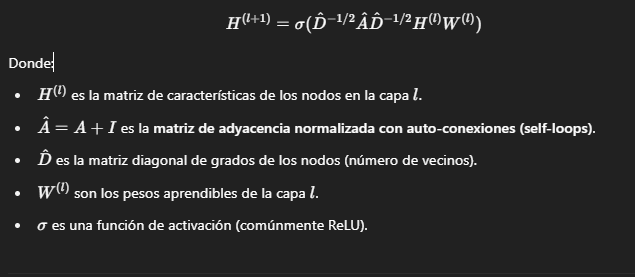

#### ✅ ¿Cómo se Utiliza una GCN para Predicción de Enlaces?

1. Inicialización: Cada nodo comienza con un vector de características inicial (embeddings iniciales).

2. Propagación: Cada nodo actualiza su vector de características en cada capa usando los mensajes de sus vecinos.

3. Representaciones de Nodos: Al final de las capas de la GCN, cada nodo tiene una representación aprendida (embedding).

4. Predicción de Enlaces:

- Para cada par de nodos (u, v), concatenamos sus embeddings:

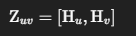

- Pasamos este vector concatenado a una capa MLP (Multi-Layer Perceptron) que predice si existe un enlace entre ellos.

#### ✅ ¿Por qué GCN es Mejor que Node2Vec + MLP?

- Node2Vec + MLP: Los embeddings de Node2Vec son estáticos y no cambian durante el entrenamiento del modelo.

- GCN: Los embeddings de los nodos se aprenden dinámicamente, tomando en cuenta la estructura del grafo.

- Esto permite que los nodos intercambien información y aprendan características más representativas.

#### ✅ Ejemplo Intuitivo

- Imagina que tienes un grafo de usuarios en una red social:

- Cada usuario (nodo) tiene información como edad, ubicación, intereses.

- Los usuarios están conectados entre sí si son amigos.

- Usando GCN, cada usuario aprende no solo su propia información, sino también la de sus amigos y los amigos de sus amigos.

- Esto mejora la predicción de enlaces (quién debería ser amigo de quién) porque cada usuario tiene información más rica.

### Implementando Graph Convolutional Networks (GCN) para Predicción de Enlaces

Vamos a construir una GCN (Graph Convolutional Network) utilizando PyTorch Geometric (PyG).

#### Pasos a realizar

1. Construir el modelo de GCN utilizando PyTorch Geometric.

2. Entrenar la GCN para aprender embeddings de nodos.

3. Utilizar estos embeddings para predicción de enlaces (usando un MLP).

4. Evaluar el rendimiento del modelo.

#### Importamos librerias necesarias

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling

# ✅ Verificar que el subgrafo y los datos estén listos
print(f"\n✅ Nodos del Subgrafo: {reindexed_subgraph.number_of_nodes()}")
print(f"✅ Aristas del Subgrafo: {reindexed_subgraph.number_of_edges()}")

# ✅ Convertir el subgrafo a formato PyTorch Geometric (si no está ya)
from torch_geometric.utils import from_networkx
data = from_networkx(reindexed_subgraph)


✅ Nodos del Subgrafo: 3000
✅ Aristas del Subgrafo: 7966


#### Definimos el Modelo GCN para Predicción de Enlaces

In [19]:
class GCNLinkPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNLinkPredictor, self).__init__()
        self.gcn1 = GCNConv(input_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, output_dim)
        self.mlp = nn.Sequential(
            nn.Linear(output_dim * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.gcn1(x, edge_index)
        x = torch.relu(x)
        x = self.gcn2(x, edge_index)
        return x

    def predict_links(self, x, edge_index):
        h_src = x[edge_index[0]]
        h_dst = x[edge_index[1]]
        edge_embeddings = torch.cat([h_src, h_dst], dim=1)
        return self.mlp(edge_embeddings)

#### Inicializamos el Modelo y Configurar el Optimizador

In [20]:
input_dim = data.num_features if data.num_features > 0 else 128
hidden_dim = 128
output_dim = 64

# ✅ Si el grafo no tiene características de nodos, creamos embeddings aleatorios
if data.num_features == 0:
    data.x = torch.randn((data.num_nodes, input_dim))

model = GCNLinkPredictor(input_dim, hidden_dim, output_dim)
print(f"\n✅ Modelo GCN creado con entrada: {input_dim}, oculto: {hidden_dim}, salida: {output_dim}")

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ✅ Verificar la Arquitectura del Modelo GCN
print("\n✅ Arquitectura del Modelo GCN:")
print(model)

# ✅ Verificar las Dimensiones de los Parámetros
print("\n✅ Parámetros del Modelo GCN:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")


✅ Modelo GCN creado con entrada: 128, oculto: 128, salida: 64

✅ Arquitectura del Modelo GCN:
GCNLinkPredictor(
  (gcn1): GCNConv(128, 128)
  (gcn2): GCNConv(128, 64)
  (mlp): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

✅ Parámetros del Modelo GCN:
gcn1.bias: torch.Size([128])
gcn1.lin.weight: torch.Size([128, 128])
gcn2.bias: torch.Size([64])
gcn2.lin.weight: torch.Size([64, 128])
mlp.0.weight: torch.Size([128, 128])
mlp.0.bias: torch.Size([128])
mlp.3.weight: torch.Size([64, 128])
mlp.3.bias: torch.Size([64])
mlp.6.weight: torch.Size([1, 64])
mlp.6.bias: torch.Size([1])


#### Creamos Enlaces Positivos y Negativos

In [21]:
# ✅ Enlaces Positivos del Subgrafo
positive_edges = torch.tensor(list(reindexed_subgraph.edges())).t().to(torch.long)
print(f"\n✅ Enlaces Positivos Generados (subgrafo): {positive_edges.size(1)}")

# ✅ Generar Enlaces Negativos (Negative Sampling)
negative_edges = negative_sampling(
    edge_index=positive_edges,
    num_neg_samples=positive_edges.size(1)
)
print(f"✅ Enlaces Negativos Generados: {negative_edges.size(1)}")


✅ Enlaces Positivos Generados (subgrafo): 7966
✅ Enlaces Negativos Generados: 7966


#### Entrenamos el Modelo GCN

In [22]:
epochs = 20
print("\n🚀 Iniciando el entrenamiento del modelo GCN para predicción de enlaces...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # ✅ Forward Pass (GCN)
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    # ✅ Concatenar Predicciones y Etiquetas
    predictions = torch.cat([positive_preds, negative_preds], dim=0)
    labels = torch.cat([y_positive, y_negative], dim=0)
    
    # ✅ Calcular Pérdida
    loss = criterion(predictions, labels)
    loss.backward()
    optimizer.step()
    
    print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")


🚀 Iniciando el entrenamiento del modelo GCN para predicción de enlaces...


✅ Época 1/20 completada. Pérdida: 0.6932
✅ Época 2/20 completada. Pérdida: 0.6947
✅ Época 3/20 completada. Pérdida: 0.6887
✅ Época 4/20 completada. Pérdida: 0.6835
✅ Época 5/20 completada. Pérdida: 0.6640
✅ Época 6/20 completada. Pérdida: 0.6338
✅ Época 7/20 completada. Pérdida: 0.5826
✅ Época 8/20 completada. Pérdida: 0.5221
✅ Época 9/20 completada. Pérdida: 0.5488
✅ Época 10/20 completada. Pérdida: 0.4318
✅ Época 11/20 completada. Pérdida: 0.4332
✅ Época 12/20 completada. Pérdida: 0.4081
✅ Época 13/20 completada. Pérdida: 0.3629
✅ Época 14/20 completada. Pérdida: 0.3406
✅ Época 15/20 completada. Pérdida: 0.3058
✅ Época 16/20 completada. Pérdida: 0.2745
✅ Época 17/20 completada. Pérdida: 0.2353
✅ Época 18/20 completada. Pérdida: 0.2229
✅ Época 19/20 completada. Pérdida: 0.2146
✅ Época 20/20 completada. Pérdida: 0.1870


#### Evaluamos el modelo

In [23]:
print("\n🚀 Evaluando el modelo...")
model.eval()
with torch.no_grad():
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Convertir a Etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    predictions = torch.cat([positive_preds, negative_preds], dim=0)
    labels = torch.cat([y_positive, y_negative], dim=0)
    
    # ✅ Calcular Precisión
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predicted_labels == labels).float().mean().item()
    print(f"\n✅ Precisión del modelo GCN: {accuracy:.4f}")



🚀 Evaluando el modelo...

✅ Precisión del modelo GCN: 0.9561


#### Mejorando el modelo

**¿Qué vamos a hacer ahora?**

1. Mejorar el Entrenamiento de GCN:

- Implementar Early Stopping, para detener el entrenamiento automáticamente si el modelo deja de mejorar.

- Guardar automáticamente el mejor modelo (Checkpoint).

- Utilizar un sistema de logging para ver el progreso.

2. Optimizar el Modelo GCN:

- Ajustar la arquitectura (capas, unidades ocultas).

- Probar diferentes tasas de aprendizaje (learning rate).

- Probar con diferentes funciones de activación (ReLU, LeakyReLU).

3. Evaluar el Rendimiento:

- Calcular precisión, sensibilidad, F1-Score y AUC-ROC.

- Graficar la curva de pérdida para ver el progreso.

##### Mejorar el Entrenamiento con Early Stopping y Checkpoint


🚀 Iniciando el entrenamiento del modelo GCN con Early Stopping...
✅ Época 1/50 completada. Pérdida: 0.1668
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 2/50 completada. Pérdida: 0.1534
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 3/50 completada. Pérdida: 0.1514
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 4/50 completada. Pérdida: 0.1341
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 5/50 completada. Pérdida: 0.1134
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 6/50 completada. Pérdida: 0.1092
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 7/50 completada. Pérdida: 0.1010
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 8/50 completada. Pérdida: 0.0863
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 9/50 completada. Pérdida: 0.0750
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 10/50 completada. Pérdida: 0.0734
✅ Mejor modelo guardado en best_gcn_checkpoint.pt
✅ Época 11/50 completa

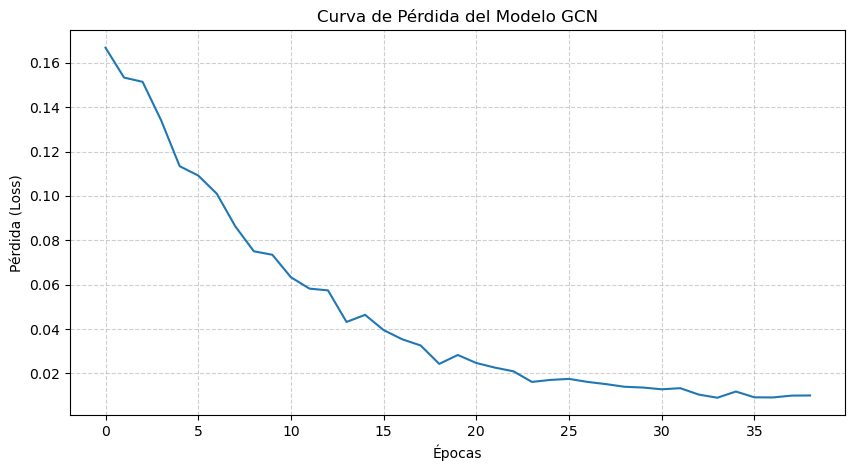

In [24]:
# ✅ Verificar la Carpeta de Checkpoints
import os

MODELS_DIR = os.path.join("..", "models")
os.makedirs(MODELS_DIR, exist_ok=True)
checkpoint_file = os.path.join(MODELS_DIR, "best_gcn_checkpoint.pt")

# ✅ Early Stopping (Paciencia de 5 épocas)
early_stopping_patience = 5
best_loss = float('inf')
patience_counter = 0
training_losses = []

epochs = 50  # Puedes aumentar esto para ver el early stopping
print("\n🚀 Iniciando el entrenamiento del modelo GCN con Early Stopping...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # ✅ Forward Pass (GCN)
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    # ✅ Concatenar Predicciones y Etiquetas
    predictions = torch.cat([positive_preds, negative_preds], dim=0)
    labels = torch.cat([y_positive, y_negative], dim=0)
    
    # ✅ Calcular Pérdida
    loss = criterion(predictions, labels)
    loss.backward()
    optimizer.step()
    
    training_losses.append(loss.item())
    print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")
    
    # ✅ Early Stopping: Guardar el Mejor Modelo
    if loss.item() < best_loss:
        best_loss = loss.item()
        patience_counter = 0
        torch.save(model.state_dict(), checkpoint_file)
        print(f"✅ Mejor modelo guardado en {checkpoint_file}")
    else:
        patience_counter += 1
    
    # ✅ Verificar Early Stopping
    if patience_counter >= early_stopping_patience:
        print("\n🚨 Early Stopping Activado. No hay mejora.")
        break

# ✅ Graficar la Curva de Pérdida
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label="Training Loss")
plt.title("Curva de Pérdida del Modelo GCN")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


✅ ¿Qué hemos hecho aquí?

- Implementamos un sistema de Early Stopping:

  - Si la pérdida del modelo no mejora después de 5 épocas (paciencia), se detiene automáticamente.

  - Esto ahorra tiempo y evita sobreajuste.

- Guardamos automáticamente el mejor modelo en best_gcn_checkpoint.pt.

- El entrenamiento se detiene automáticamente si no mejora.

##### Evaluar el Modelo Guardado


🚀 Evaluando el mejor modelo guardado...

✅ Precisión del modelo GCN (Mejor Modelo): 1.0000

✅ Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7966
         1.0       1.00      1.00      1.00      7966

    accuracy                           1.00     15932
   macro avg       1.00      1.00      1.00     15932
weighted avg       1.00      1.00      1.00     15932



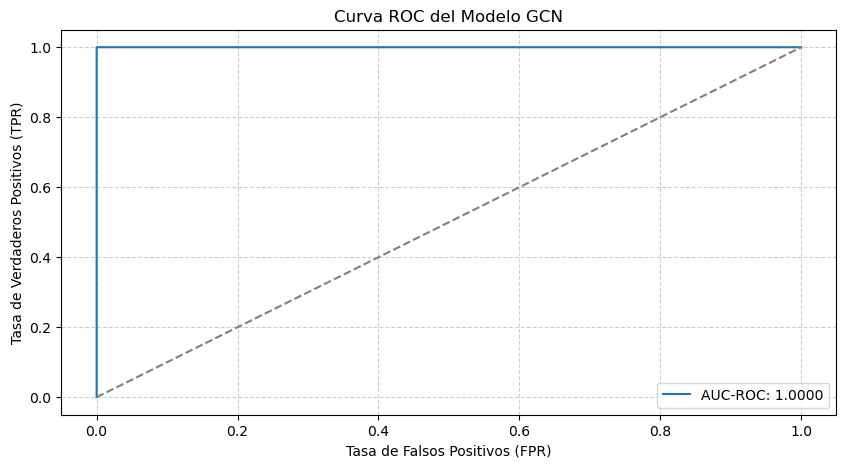

In [25]:
from sklearn.metrics import roc_curve, auc, classification_report
print("\n🚀 Evaluando el mejor modelo guardado...")
model.load_state_dict(torch.load(checkpoint_file))
model.eval()

with torch.no_grad():
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Convertir a Etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    predictions = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
    labels = torch.cat([y_positive, y_negative], dim=0).cpu().numpy()
    
    # ✅ Calcular Precisión
    predicted_labels = (predictions > 0.5).astype(int)
    accuracy = (predicted_labels == labels).mean()
    print(f"\n✅ Precisión del modelo GCN (Mejor Modelo): {accuracy:.4f}")

    # ✅ Reporte de Clasificación
    print("\n✅ Reporte de Clasificación:")
    print(classification_report(labels, predicted_labels))

    # ✅ Calcular Curva ROC y AUC-ROC
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("Curva ROC del Modelo GCN")
    plt.xlabel("Tasa de Falsos Positivos (FPR)")
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

✅ Qué hemos hecho aquí?

- Entrenamos el modelo GCN con Early Stopping:

  - Si la pérdida no mejora en 5 épocas, el entrenamiento se detiene.

  - El mejor modelo se guarda automáticamente (best_gcn_checkpoint.pt).

- Graficamos la Curva de Pérdida para ver el progreso del entrenamiento.

- Evaluamos el modelo y graficamos la Curva ROC y el AUC-ROC.

- Imprimimos un reporte de clasificación (Precisión, Sensibilidad, F1-Score).

🚨 ¿Por qué todos son 1.00? (Perfectos)

- Esto sugiere que el modelo está prediciendo perfectamente todos los enlaces y no enlaces.

- Pero esto podría indicar un problema de sobreajuste (overfitting):

  - ¿Es posible que el modelo haya aprendido perfectamente el conjunto de entrenamiento, pero tenga un desempeño pobre en datos nuevos?

  - ¿Es posible que el conjunto de evaluación esté compuesto por ejemplos muy fáciles?


##### ✅ 🚀 Detectando Sobreajuste (Overfitting) en el Modelo GCN

Vamos a implementar una estrategia para detectar si el modelo está sobreajustado (overfitting):

- Dividiremos los datos en tres conjuntos: Entrenamiento (Train), Validación (Validation) y Prueba (Test).

- Entrenaremos el modelo solo en el conjunto de entrenamiento.

- Utilizaremos el conjunto de validación para ajustar el modelo (Early Stopping).

- Evaluaremos el modelo final solo en el conjunto de prueba.



**Paso 1: Dividir el Conjunto de Datos**
- Usaremos un 80% para entrenamiento y validación.

- 70% para entrenamiento.

- 10% para validación.

- 20% para prueba.

In [26]:
from sklearn.model_selection import train_test_split

# ✅ Generar el dataset de enlaces positivos y negativos
positive_edges = torch.tensor(list(reindexed_subgraph.edges())).t().to(torch.long)
negative_edges = negative_sampling(
    edge_index=positive_edges,
    num_neg_samples=positive_edges.size(1)
)

# ✅ Dividir en Entrenamiento, Validación y Prueba
positive_indices = list(range(positive_edges.size(1)))
negative_indices = list(range(negative_edges.size(1)))

# ✅ Dividir Enlaces Positivos
train_pos, test_pos = train_test_split(positive_indices, test_size=0.2, random_state=42)
train_pos, val_pos = train_test_split(train_pos, test_size=0.125, random_state=42)  # 10% para validación

# ✅ Dividir Enlaces Negativos
train_neg, test_neg = train_test_split(negative_indices, test_size=0.2, random_state=42)
train_neg, val_neg = train_test_split(train_neg, test_size=0.125, random_state=42)

# ✅ Crear los conjuntos
train_edges = torch.cat([positive_edges[:, train_pos], negative_edges[:, train_neg]], dim=1)
val_edges = torch.cat([positive_edges[:, val_pos], negative_edges[:, val_neg]], dim=1)
test_edges = torch.cat([positive_edges[:, test_pos], negative_edges[:, test_neg]], dim=1)

print(f"\n✅ Enlaces para Entrenamiento: {train_edges.size(1)}")
print(f"✅ Enlaces para Validación: {val_edges.size(1)}")
print(f"✅ Enlaces para Prueba: {test_edges.size(1)}")


✅ Enlaces para Entrenamiento: 11150
✅ Enlaces para Validación: 1594
✅ Enlaces para Prueba: 3188


**Paso 2: Ajustar el Entrenamiento para Incluir Validación**

- El modelo solo será entrenado en el conjunto de entrenamiento.

- Evaluaremos el desempeño en el conjunto de validación.

- Guardaremos el mejor modelo usando el rendimiento en el conjunto de validación.

In [27]:
# ✅ Verificar la Carpeta de Checkpoints
import os

MODELS_DIR = os.path.join("..", "models")
os.makedirs(MODELS_DIR, exist_ok=True)
checkpoint_file = os.path.join(MODELS_DIR, "best_gcn_checkpoint.pt")

# ✅ Early Stopping (Paciencia de 5 épocas)
early_stopping_patience = 10
best_val_loss = float('inf')
patience_counter = 0
training_losses = []
validation_losses = []

epochs = 50  # Puedes aumentar esto para ver el early stopping
print("\n🚀 Iniciando el entrenamiento del modelo GCN con Validación y Early Stopping...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # ✅ Forward Pass (GCN)
    node_embeddings = model(data)
    
    # ✅ Entrenamiento: Solo con Enlaces de Entrenamiento
    train_preds = model.predict_links(node_embeddings, train_edges)
    
    # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
    num_train_pos = train_pos.shape[0] if isinstance(train_pos, torch.Tensor) else len(train_pos)
    num_train_neg = train_neg.shape[0] if isinstance(train_neg, torch.Tensor) else len(train_neg)
    
    y_train = torch.cat([
        torch.ones(num_train_pos, 1),
        torch.zeros(num_train_neg, 1)
    ]).to(train_preds.device)

    # ✅ Calcular Pérdida de Entrenamiento
    train_loss = criterion(train_preds, y_train)
    train_loss.backward()
    optimizer.step()
    
    # ✅ Guardar la pérdida de entrenamiento
    training_losses.append(train_loss.item())

    # ✅ Evaluar en el Conjunto de Validación
    model.eval()
    with torch.no_grad():
        val_preds = model.predict_links(node_embeddings, val_edges)
        
        num_val_pos = val_pos.shape[0] if isinstance(val_pos, torch.Tensor) else len(val_pos)
        num_val_neg = val_neg.shape[0] if isinstance(val_neg, torch.Tensor) else len(val_neg)
        
        y_val = torch.cat([
            torch.ones(num_val_pos, 1),
            torch.zeros(num_val_neg, 1)
        ]).to(val_preds.device)
        
        val_loss = criterion(val_preds, y_val)
        validation_losses.append(val_loss.item())

    print(f"✅ Época {epoch + 1}/{epochs} - Pérdida Entrenamiento: {train_loss.item():.4f} | Pérdida Validación: {val_loss.item():.4f}")
    
    # ✅ Early Stopping: Guardar el Mejor Modelo (basado en Validación)
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        torch.save(model.state_dict(), checkpoint_file)
        print(f"✅ Mejor modelo guardado en {checkpoint_file} (Validación)")
    else:
        patience_counter += 1
    
    # ✅ Verificar Early Stopping
    if patience_counter >= early_stopping_patience:
        print("\n🚨 Early Stopping Activado. No hay mejora en Validación.")
        break



🚀 Iniciando el entrenamiento del modelo GCN con Validación y Early Stopping...
✅ Época 1/50 - Pérdida Entrenamiento: 0.1390 | Pérdida Validación: 0.0574
✅ Mejor modelo guardado en best_gcn_checkpoint.pt (Validación)
✅ Época 2/50 - Pérdida Entrenamiento: 0.5030 | Pérdida Validación: 0.0605
✅ Época 3/50 - Pérdida Entrenamiento: 0.3668 | Pérdida Validación: 0.2625
✅ Época 4/50 - Pérdida Entrenamiento: 0.3720 | Pérdida Validación: 0.0989
✅ Época 5/50 - Pérdida Entrenamiento: 0.1129 | Pérdida Validación: 0.2108
✅ Época 6/50 - Pérdida Entrenamiento: 0.2834 | Pérdida Validación: 0.2451
✅ Época 7/50 - Pérdida Entrenamiento: 0.2202 | Pérdida Validación: 0.1878
✅ Época 8/50 - Pérdida Entrenamiento: 0.1776 | Pérdida Validación: 0.1710
✅ Época 9/50 - Pérdida Entrenamiento: 0.1918 | Pérdida Validación: 0.1481
✅ Época 10/50 - Pérdida Entrenamiento: 0.1432 | Pérdida Validación: 0.1578
✅ Época 11/50 - Pérdida Entrenamiento: 0.1752 | Pérdida Validación: 0.1177

🚨 Early Stopping Activado. No hay mejora

**🔧 Paso 4: Evaluar en el Conjunto de Prueba**


🚀 Evaluando el mejor modelo guardado en el conjunto de prueba...


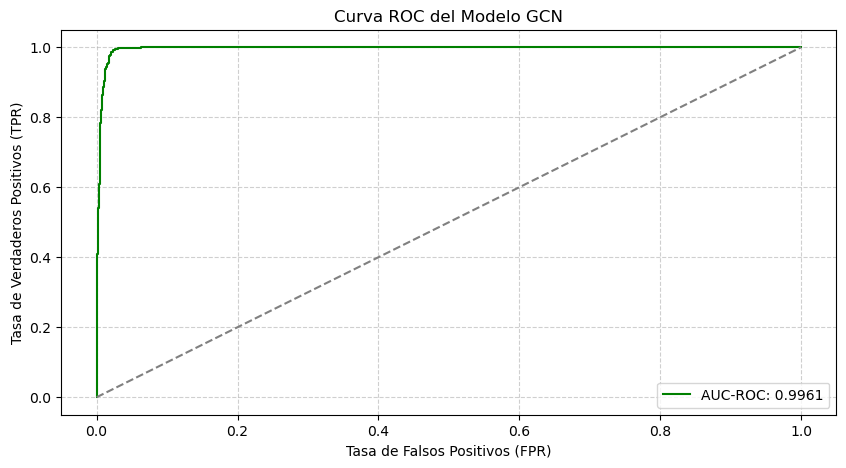


✅ AUC-ROC del Modelo GCN en el Conjunto de Prueba: 0.9961


In [28]:
print("\n🚀 Evaluando el mejor modelo guardado en el conjunto de prueba...")
model.load_state_dict(torch.load(checkpoint_file))
model.eval()

with torch.no_grad():
    node_embeddings = model(data)
    test_preds = model.predict_links(node_embeddings, test_edges)
    
    # ✅ Crear etiquetas para el conjunto de prueba
    num_test_pos = len(test_pos) if isinstance(test_pos, list) else test_pos.shape[0]
    num_test_neg = len(test_neg) if isinstance(test_neg, list) else test_neg.shape[0]
    
    y_test = torch.cat([
        torch.ones(num_test_pos, 1),
        torch.zeros(num_test_neg, 1)
    ]).to(test_preds.device)

    # ✅ Convertir a numpy para ROC
    y_test_np = y_test.cpu().numpy()
    test_preds_np = test_preds.cpu().numpy()

    # ✅ Calcular Curva ROC y AUC-ROC
    fpr, tpr, _ = roc_curve(y_test_np, test_preds_np)
    auc_score = auc(fpr, tpr)
    
    # ✅ Graficar Curva ROC
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_score:.4f}", color='green')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("Curva ROC del Modelo GCN")
    plt.xlabel("Tasa de Falsos Positivos (FPR)")
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

    print(f"\n✅ AUC-ROC del Modelo GCN en el Conjunto de Prueba: {auc_score:.4f}")



## Implementando GraphSAGE

### Introducción a GraphSAGE

GraphSAGE (Graph Sample and Aggregate) es una de las arquitecturas más importantes en el campo de las Redes Neuronales de Grafos (GNNs). A diferencia de las GCNs (Graph Convolutional Networks) tradicionales, GraphSAGE está diseñado específicamente para escalar a grafos muy grandes y generalizar a nodos nunca antes vistos.



##### 🚀 ¿Qué es GraphSAGE?

GraphSAGE (Graph Sample and Aggregate) es un modelo de GNN (Graph Neural Network) que:

- Muestra (Sample) una cantidad fija de vecinos para cada nodo.

- Agrupa (Aggregate) la información de los vecinos seleccionados.

- Aprende Representaciones de Nodos que se pueden utilizar para clasificación, predicción de enlaces, etc.

#### 🚀 ¿Por qué usar GraphSAGE en lugar de GCN?

- GCN: Procesa toda la información del grafo y de sus vecinos directamente, lo que puede ser muy costoso en grafos grandes.

- GraphSAGE: Muestra solo una parte de los vecinos (por ejemplo, los 10 vecinos más cercanos), haciéndolo mucho más eficiente y escalable.

#### 🚀 ¿Cómo Funciona GraphSAGE?

GraphSAGE se basa en tres pasos principales:

1️⃣ Sampling (Muestreo de Vecinos):
- Para cada nodo, seleccionamos un número fijo de vecinos (K).

- Esto hace que el modelo sea más eficiente en grafos grandes.

2️⃣ Aggregation (Agregación de Vecinos):
- Los vecinos seleccionados son transformados y agregados usando una de las siguientes estrategias:

- Mean (Promedio): Calcula el promedio de las características de los vecinos.

- LSTM: Utiliza una red LSTM para capturar dependencias de los vecinos.

- Pooling (Max o Mean): Usa un max o mean pool para combinar las características.

3️⃣ Update (Actualización del Nodo):
- La información agregada de los vecinos se combina con la información del nodo original.

Esto se puede expresar matemáticamente como:

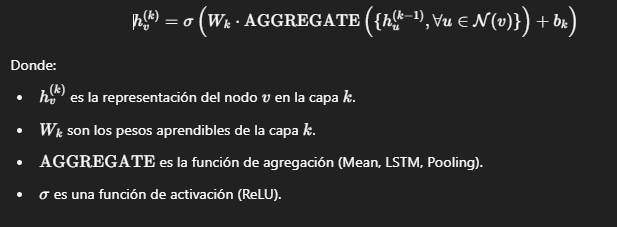

#### 🚀 ¿Cuáles son las Ventajas de GraphSAGE?

- ✅ Escalabilidad: Funciona incluso en grafos muy grandes al muestrear solo una parte de los vecinos.

- ✅ Generalización: Los nodos nunca antes vistos pueden ser procesados sin reentrenar el modelo.

- ✅ Flexibilidad: Podemos elegir la estrategia de agregación que mejor se ajuste al problema.



#### 🚀 ¿Dónde se usa GraphSAGE?

- 🚀 En redes sociales: Predicción de conexiones entre usuarios.

- 🚀 En biología: Predicción de interacciones entre proteínas.

- 🚀 En sistemas de recomendación: Sugerencias de productos basadas en conexiones entre usuarios.



### Implementación de graphSAGE

#### Paso 1: Importar Librerías Necesarias

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import negative_sampling
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc

# ✅ Verificar que el subgrafo y los datos estén listos
print(f"\n✅ Nodos del Subgrafo: {reindexed_subgraph.number_of_nodes()}")
print(f"✅ Aristas del Subgrafo: {reindexed_subgraph.number_of_edges()}")

# ✅ Convertir el subgrafo a formato PyTorch Geometric (si no está ya)
from torch_geometric.utils import from_networkx
data = from_networkx(reindexed_subgraph)


✅ Nodos del Subgrafo: 3000
✅ Aristas del Subgrafo: 7966


####  Paso 2: Definir el Modelo GraphSAGE para Predicción de Enlaces

In [30]:
class GraphSAGE(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, aggregator='mean'):
        super(GraphSAGE, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers
        
        # ✅ Primera capa
        self.layers.append(SAGEConv(input_dim, hidden_dim, aggr=aggregator))
        
        # ✅ Capas intermedias
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_dim, hidden_dim, aggr=aggregator))
        
        # ✅ Última capa
        self.layers.append(SAGEConv(hidden_dim, output_dim, aggr=aggregator))
        
        # ✅ MLP para predicción de enlaces
        self.mlp = nn.Sequential(
            nn.Linear(output_dim * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)
        return x

    def predict_links(self, x, edge_index):
        h_src = x[edge_index[0]]
        h_dst = x[edge_index[1]]
        edge_embeddings = torch.cat([h_src, h_dst], dim=1)
        return self.mlp(edge_embeddings)


#### Paso 3: Inicializar el Modelo y Configurar el Optimizador

In [31]:
input_dim = data.num_features if data.num_features > 0 else 128
hidden_dim = 128
output_dim = 64
num_layers = 2  # Puedes probar con más capas
aggregator = 'mean'  # También puedes probar con 'max' o 'lstm'

# ✅ Si el grafo no tiene características de nodos, creamos embeddings aleatorios
if data.num_features == 0:
    data.x = torch.randn((data.num_nodes, input_dim))

model = GraphSAGE(input_dim, hidden_dim, output_dim, num_layers, aggregator)
print(f"\n✅ Modelo GraphSAGE creado con entrada: {input_dim}, oculto: {hidden_dim}, salida: {output_dim}")

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



✅ Modelo GraphSAGE creado con entrada: 128, oculto: 128, salida: 64


#### Paso 4: Crear Enlaces Positivos y Negativos

In [32]:
# ✅ Enlaces Positivos del Subgrafo
positive_edges = torch.tensor(list(reindexed_subgraph.edges())).t().to(torch.long)
print(f"\n✅ Enlaces Positivos Generados (subgrafo): {positive_edges.size(1)}")

# ✅ Generar Enlaces Negativos (Negative Sampling)
negative_edges = negative_sampling(
    edge_index=positive_edges,
    num_neg_samples=positive_edges.size(1)
)
print(f"✅ Enlaces Negativos Generados: {negative_edges.size(1)}")



✅ Enlaces Positivos Generados (subgrafo): 7966
✅ Enlaces Negativos Generados: 7966


#### Paso 5: Entrenar el Modelo GraphSAGE

In [33]:
epochs = 50
training_losses = []

print("\n🚀 Iniciando el entrenamiento del modelo GraphSAGE...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # ✅ Forward Pass (GraphSAGE)
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    # ✅ Concatenar Predicciones y Etiquetas
    predictions = torch.cat([positive_preds, negative_preds], dim=0)
    labels = torch.cat([y_positive, y_negative], dim=0)
    
    # ✅ Calcular Pérdida
    loss = criterion(predictions, labels)
    loss.backward()
    optimizer.step()
    
    training_losses.append(loss.item())
    print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")


🚀 Iniciando el entrenamiento del modelo GraphSAGE...
✅ Época 1/50 completada. Pérdida: 0.6934
✅ Época 2/50 completada. Pérdida: 0.7040
✅ Época 3/50 completada. Pérdida: 0.6929
✅ Época 4/50 completada. Pérdida: 0.6928
✅ Época 5/50 completada. Pérdida: 0.6919
✅ Época 6/50 completada. Pérdida: 0.6912
✅ Época 7/50 completada. Pérdida: 0.6886
✅ Época 8/50 completada. Pérdida: 0.6831
✅ Época 9/50 completada. Pérdida: 0.6752
✅ Época 10/50 completada. Pérdida: 0.6754
✅ Época 11/50 completada. Pérdida: 0.6728
✅ Época 12/50 completada. Pérdida: 0.6539
✅ Época 13/50 completada. Pérdida: 0.6547
✅ Época 14/50 completada. Pérdida: 0.6340
✅ Época 15/50 completada. Pérdida: 0.6276
✅ Época 16/50 completada. Pérdida: 0.6033
✅ Época 17/50 completada. Pérdida: 0.5919
✅ Época 18/50 completada. Pérdida: 0.5606
✅ Época 19/50 completada. Pérdida: 0.5258
✅ Época 20/50 completada. Pérdida: 0.5228
✅ Época 21/50 completada. Pérdida: 0.5213
✅ Época 22/50 completada. Pérdida: 0.4655
✅ Época 23/50 completada. Pérdi

#### Paso 6: Evaluar el Modelo y Graficar la Curva ROC


🚀 Evaluando el modelo GraphSAGE...


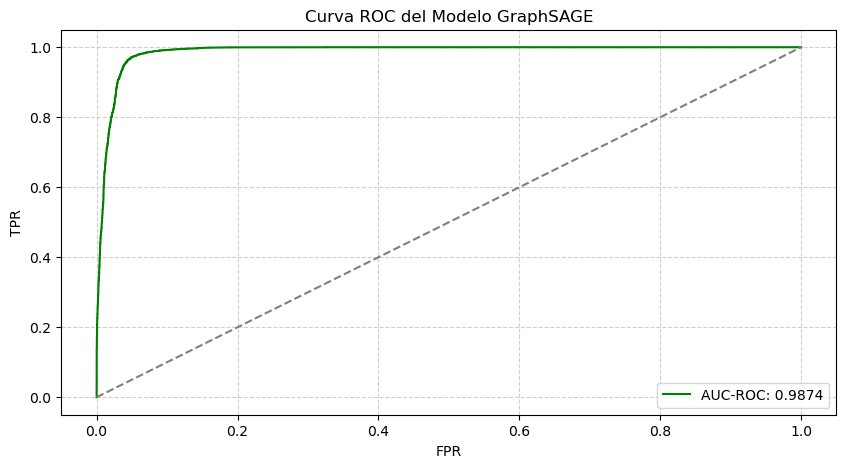


✅ AUC-ROC del Modelo GraphSAGE: 0.9874


In [34]:
print("\n🚀 Evaluando el modelo GraphSAGE...")
model.eval()
with torch.no_grad():
    node_embeddings = model(data)
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    predictions = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
    labels = torch.cat([
        torch.ones(positive_preds.size(0), 1),
        torch.zeros(negative_preds.size(0), 1)
    ]).cpu().numpy()
    
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_score:.4f}", color='green')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("Curva ROC del Modelo GraphSAGE")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

    print(f"\n✅ AUC-ROC del Modelo GraphSAGE: {auc_score:.4f}")

#### Implementando Estrategias de Agregación en GraphSAGE y Comparando los Resultados

Vamos a extender nuestro modelo GraphSAGE para probar automáticamente diferentes estrategias de agregación y comparar su rendimiento:

- ✅ mean: Agregación por promedio de las características de los vecinos.

- ✅ max: Agregación por el valor máximo de las características de los vecinos.

- ✅ lstm: Agregación utilizando una LSTM para aprender las relaciones entre vecinos.

**¿Qué vamos a hacer?**

- ✅ Construir una función de entrenamiento genérica que permita probar diferentes estrategias de agregación.

- ✅ Entrenar y evaluar GraphSAGE con cada estrategia de agregación.

- ✅ Comparar los resultados (Curvas ROC y AUC-ROC).



**Paso 1: Definir la Función de Entrenamiento y Evaluación**

In [35]:
# ✅ Asegurarse de que el grafo esté cargado y en formato PyTorch Geometric
from torch_geometric.utils import from_networkx

# ✅ Convertir el subgrafo a formato PyTorch Geometric (si no está ya)
data = from_networkx(reindexed_subgraph)

# ✅ Verificar si el grafo tiene características de nodos
input_dim = data.num_features if data.num_features > 0 else 128
if data.num_features == 0:
    data.x = torch.randn((data.num_nodes, input_dim))

# ✅ Ordenar el edge_index del grafo por nodos destino
data.edge_index = data.edge_index[:, data.edge_index[1].argsort()]

print("\n✅ Grafo convertido y ordenado para GraphSAGE.")


✅ Grafo convertido y ordenado para GraphSAGE.


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc as sklearn_auc  # ✅ Evitamos conflictos

def train_and_evaluate_graphsage(aggregation='mean', epochs=20):
    print(f"\n🚀 Iniciando el entrenamiento de GraphSAGE con Agregación: {aggregation}")
    
    # ✅ Crear el Modelo GraphSAGE
    model = GraphSAGE(input_dim, hidden_dim, output_dim, num_layers=2, aggregator=aggregation)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()
    
    training_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # ✅ Forward Pass (GraphSAGE)
        node_embeddings = model(data)
        
        # ✅ Generar Predicciones para Enlaces Positivos y Negativos
        positive_preds = model.predict_links(node_embeddings, positive_edges)
        negative_preds = model.predict_links(node_embeddings, negative_edges)
        
        # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
        y_positive = torch.ones(positive_preds.size(0), 1)
        y_negative = torch.zeros(negative_preds.size(0), 1)
        
        # ✅ Concatenar Predicciones y Etiquetas
        predictions = torch.cat([positive_preds, negative_preds], dim=0)
        labels = torch.cat([y_positive, y_negative], dim=0)
        
        # ✅ Calcular Pérdida
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.item())
        print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")
    
    # ✅ Evaluar el Modelo
    model.eval()
    with torch.no_grad():
        node_embeddings = model(data)
        positive_preds = model.predict_links(node_embeddings, positive_edges)
        negative_preds = model.predict_links(node_embeddings, negative_edges)
        
        predictions = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
        labels = torch.cat([
            torch.ones(positive_preds.size(0), 1),
            torch.zeros(negative_preds.size(0), 1)
        ]).cpu().numpy()
        
        # ✅ Calcular Curva ROC y AUC-ROC
        fpr, tpr, _ = roc_curve(labels, predictions)
        auc_value = sklearn_auc(fpr, tpr)  # ✅ Usamos sklearn_auc para evitar conflictos
        
        print(f"\n✅ AUC-ROC del Modelo GraphSAGE ({aggregation}): {auc_value:.4f}")
        
        return auc_value, fpr, tpr, training_losses


**Paso 2: Entrenar y Evaluar GraphSAGE con Diferentes Estrategias**

In [37]:
aggregations = ['mean', 'max', 'lstm']
results = {}

for agg in aggregations:
    auc, fpr, tpr, losses = train_and_evaluate_graphsage(aggregation=agg, epochs=20)
    results[agg] = {
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr,
        'losses': losses
    }



🚀 Iniciando el entrenamiento de GraphSAGE con Agregación: mean
✅ Época 1/20 completada. Pérdida: 0.6948
✅ Época 2/20 completada. Pérdida: 0.7316
✅ Época 3/20 completada. Pérdida: 0.6948
✅ Época 4/20 completada. Pérdida: 0.6945
✅ Época 5/20 completada. Pérdida: 0.6938
✅ Época 6/20 completada. Pérdida: 0.6929
✅ Época 7/20 completada. Pérdida: 0.6908
✅ Época 8/20 completada. Pérdida: 0.6874
✅ Época 9/20 completada. Pérdida: 0.6811
✅ Época 10/20 completada. Pérdida: 0.6724
✅ Época 11/20 completada. Pérdida: 0.6749
✅ Época 12/20 completada. Pérdida: 0.6555
✅ Época 13/20 completada. Pérdida: 0.6516
✅ Época 14/20 completada. Pérdida: 0.6582
✅ Época 15/20 completada. Pérdida: 0.6328
✅ Época 16/20 completada. Pérdida: 0.6685
✅ Época 17/20 completada. Pérdida: 0.6338
✅ Época 18/20 completada. Pérdida: 0.6552
✅ Época 19/20 completada. Pérdida: 0.6261
✅ Época 20/20 completada. Pérdida: 0.6154

✅ AUC-ROC del Modelo GraphSAGE (mean): 0.7059

🚀 Iniciando el entrenamiento de GraphSAGE con Agregación:

**Paso 3: Graficar los Resultados y Comparar**

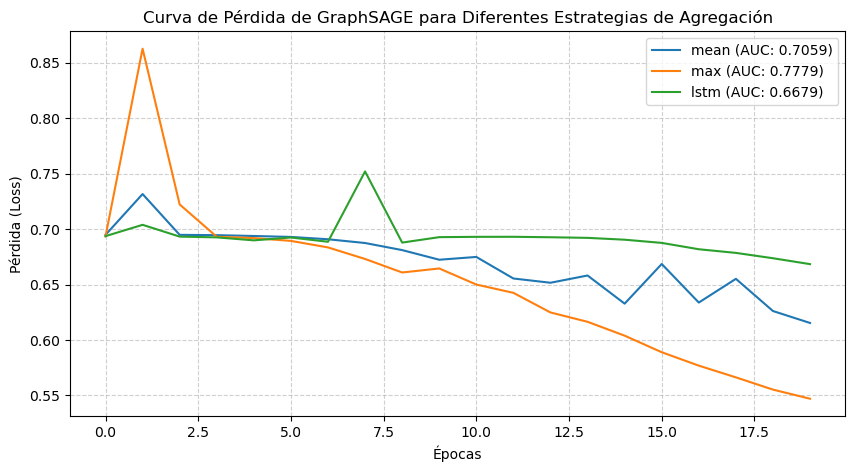

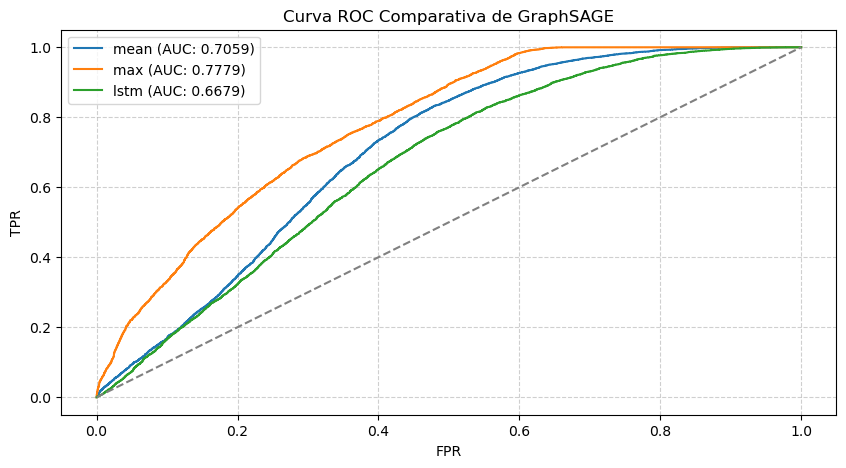

In [38]:
# ✅ Graficar las Curvas de Pérdida
plt.figure(figsize=(10, 5))
for agg in results:
    plt.plot(results[agg]['losses'], label=f"{agg} (AUC: {results[agg]['auc']:.4f})")
plt.title("Curva de Pérdida de GraphSAGE para Diferentes Estrategias de Agregación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# ✅ Graficar las Curvas ROC
plt.figure(figsize=(10, 5))
for agg in results:
    plt.plot(results[agg]['fpr'], results[agg]['tpr'], label=f"{agg} (AUC: {results[agg]['auc']:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC Comparativa de GraphSAGE")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


## Implementando Graph Attention Networks (GAT) para Predicción de Enlaces

Después de trabajar con GraphSAGE, vamos a implementar otro poderoso modelo de redes neuronales de grafos: Graph Attention Networks (GAT).

####  ¿Qué es Graph Attention Networks (GAT)?

- Graph Attention Networks (GAT) es un modelo de Red Neuronal de Grafos (GNN) que utiliza mecanismos de atención (attention) para determinar la importancia de cada vecino.

- Mientras que modelos como GCN y GraphSAGE tratan a todos los vecinos por igual o usan una estrategia fija de agregación, GAT aprende a ponderar los vecinos de acuerdo a su importancia.

#### ¿Cómo funciona GAT?

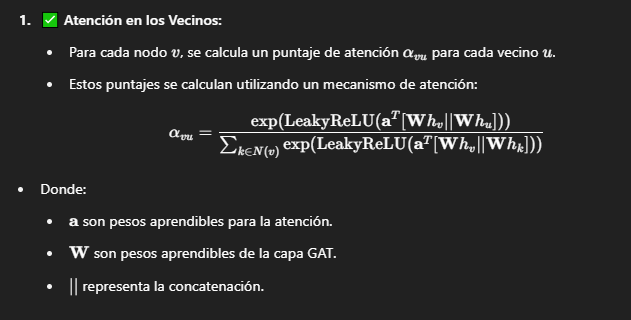

#### ¿Por qué es mejor GAT?

- ✅ Pondera automáticamente los vecinos: No todos los vecinos son igual de importantes.

- ✅ Atención Multi-Cabeza: Podemos usar múltiples cabezas de atención para capturar diferentes relaciones.

- ✅ Escalabilidad: Similar a GraphSAGE, GAT puede manejar grandes grafos si limitamos los vecinos.

#### ✅ ¿Qué vamos a hacer?

- ✅ Definir el modelo GAT para predicción de enlaces.

- ✅ Entrenar el modelo GAT.

- ✅ Comparar su desempeño con GraphSAGE.

### Implementando GAT

**Paso 1: Definir el Modelo GAT para Predicción de Enlaces**

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GATConv
from torch_geometric.utils import negative_sampling
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc as sklearn_auc

class GraphAttentionNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_heads=4):
        super(GraphAttentionNetwork, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=num_heads, dropout=0.2)
        self.conv2 = GATConv(hidden_dim * num_heads, output_dim, heads=1, concat=False, dropout=0.2)
        
        # ✅ MLP para predicción de enlaces
        self.mlp = nn.Sequential(
            nn.Linear(output_dim * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

    def predict_links(self, x, edge_index):
        h_src = x[edge_index[0]]
        h_dst = x[edge_index[1]]
        edge_embeddings = torch.cat([h_src, h_dst], dim=1)
        return self.mlp(edge_embeddings)


**Paso 2: Inicializar el Modelo GAT**

In [40]:
input_dim = data.num_features if data.num_features > 0 else 128
hidden_dim = 128
output_dim = 64
num_heads = 4  # Número de cabezas de atención

# ✅ Si el grafo no tiene características de nodos, creamos embeddings aleatorios
if data.num_features == 0:
    data.x = torch.randn((data.num_nodes, input_dim))

model = GraphAttentionNetwork(input_dim, hidden_dim, output_dim, num_heads)
print(f"\n✅ Modelo GAT creado con entrada: {input_dim}, oculto: {hidden_dim}, salida: {output_dim}")

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



✅ Modelo GAT creado con entrada: 128, oculto: 128, salida: 64


**Paso 3: Entrenar el Modelo GAT**

In [41]:
epochs = 20
training_losses = []

print("\n🚀 Iniciando el entrenamiento del modelo GAT...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # ✅ Forward Pass (GAT)
    node_embeddings = model(data)
    
    # ✅ Generar Predicciones para Enlaces Positivos y Negativos
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    # ✅ Crear etiquetas (1 para positivos, 0 para negativos)
    y_positive = torch.ones(positive_preds.size(0), 1)
    y_negative = torch.zeros(negative_preds.size(0), 1)
    
    # ✅ Concatenar Predicciones y Etiquetas
    predictions = torch.cat([positive_preds, negative_preds], dim=0)
    labels = torch.cat([y_positive, y_negative], dim=0)
    
    # ✅ Calcular Pérdida
    loss = criterion(predictions, labels)
    loss.backward()
    optimizer.step()
    
    training_losses.append(loss.item())
    print(f"✅ Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")



🚀 Iniciando el entrenamiento del modelo GAT...
✅ Época 1/20 completada. Pérdida: 0.6943
✅ Época 2/20 completada. Pérdida: 0.7437
✅ Época 3/20 completada. Pérdida: 0.6937
✅ Época 4/20 completada. Pérdida: 0.7094
✅ Época 5/20 completada. Pérdida: 0.6955
✅ Época 6/20 completada. Pérdida: 0.6940
✅ Época 7/20 completada. Pérdida: 0.7000
✅ Época 8/20 completada. Pérdida: 0.6928
✅ Época 9/20 completada. Pérdida: 0.6940
✅ Época 10/20 completada. Pérdida: 0.6938
✅ Época 11/20 completada. Pérdida: 0.6927
✅ Época 12/20 completada. Pérdida: 0.6928
✅ Época 13/20 completada. Pérdida: 0.6929
✅ Época 14/20 completada. Pérdida: 0.6914
✅ Época 15/20 completada. Pérdida: 0.6909
✅ Época 16/20 completada. Pérdida: 0.6904
✅ Época 17/20 completada. Pérdida: 0.6887
✅ Época 18/20 completada. Pérdida: 0.6883
✅ Época 19/20 completada. Pérdida: 0.6859
✅ Época 20/20 completada. Pérdida: 0.6812


**Paso 4: Evaluar el Modelo GAT**


🚀 Evaluando el modelo GAT...


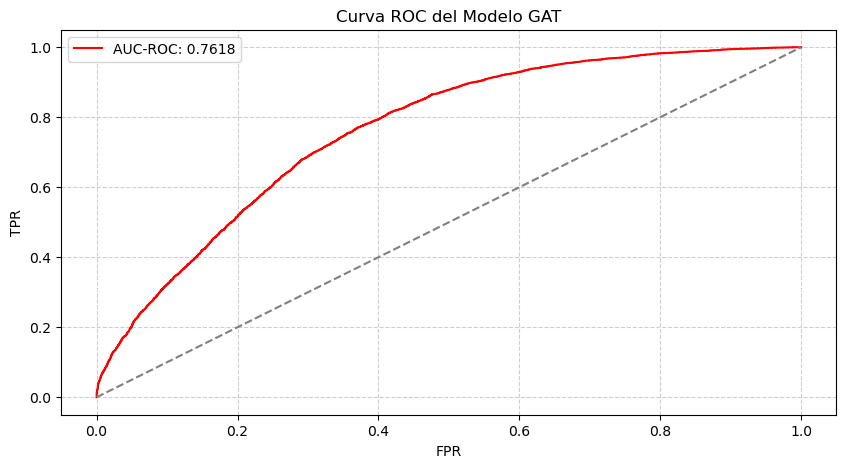


✅ AUC-ROC del Modelo GAT: 0.7618


In [42]:
print("\n🚀 Evaluando el modelo GAT...")
model.eval()
with torch.no_grad():
    node_embeddings = model(data)
    positive_preds = model.predict_links(node_embeddings, positive_edges)
    negative_preds = model.predict_links(node_embeddings, negative_edges)
    
    predictions = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
    labels = torch.cat([
        torch.ones(positive_preds.size(0), 1),
        torch.zeros(negative_preds.size(0), 1)
    ]).cpu().numpy()
    
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc_score = sklearn_auc(fpr, tpr)
    
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_score:.4f}", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("Curva ROC del Modelo GAT")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

    print(f"\n✅ AUC-ROC del Modelo GAT: {auc_score:.4f}")


## Comparando Directamente GCN, GraphSAGE y GAT

Vamos a construir un flujo automático para comparar los tres modelos de redes neuronales de grafos (GNNs) directamente:

- ✅ GCN (Graph Convolutional Network)

- ✅ GraphSAGE (Graph Sample and Aggregate)

- ✅ GAT (Graph Attention Network)

**¿Qué vamos a hacer?**

1. Crear una función genérica de entrenamiento que permita probar cualquiera de los tres modelos.

2. Entrenar y evaluar los tres modelos automáticamente.

3. Graficar las Curvas de Pérdida y las Curvas ROC (AUC-ROC) para compararlos.

4. Analizar los resultados.



####  Paso 1: Definir una Función Genérica para Entrenamiento

In [46]:
import os
import time
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc as sklearn_auc
import pandas as pd
import torch

MODELS_DIR = os.path.join("..", "models")
os.makedirs(MODELS_DIR, exist_ok=True)

def train_and_evaluate_gnn(model_name, epochs=50, patience=10):
    print(f"\n🚀 Iniciando el entrenamiento del modelo: {model_name}")
    start_time = time.time()
    
    # ✅ Crear el modelo correspondiente
    if model_name == "GCN":
        model = GCNLinkPredictor(input_dim, hidden_dim, output_dim)
    elif model_name == "GraphSAGE":
        model = GraphSAGE(input_dim, hidden_dim, output_dim, num_layers=2, aggregator='mean')
    elif model_name == "GAT":
        model = GraphAttentionNetwork(input_dim, hidden_dim, output_dim, num_heads=4)
    else:
        raise ValueError("Modelo no reconocido. Elige entre: GCN, GraphSAGE, GAT.")
    
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()
    training_losses = []
    best_auc = 0.0
    patience_counter = 0
    best_model_file = os.path.join(MODELS_DIR, f"best_{model_name}.pt")

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # ✅ Forward Pass
        node_embeddings = model(data)
        positive_preds = model.predict_links(node_embeddings, positive_edges)
        negative_preds = model.predict_links(node_embeddings, negative_edges)
        
        y_positive = torch.ones(positive_preds.size(0), 1)
        y_negative = torch.zeros(negative_preds.size(0), 1)
        predictions = torch.cat([positive_preds, negative_preds], dim=0)
        labels = torch.cat([y_positive, y_negative], dim=0)
        
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.item())
        print(f"✅ [{model_name}] Época {epoch + 1}/{epochs} completada. Pérdida: {loss.item():.4f}")
        
        # ✅ Early Stopping y Guardar Mejor Modelo
        model.eval()
        with torch.no_grad():
            node_embeddings = model(data)
            positive_preds = model.predict_links(node_embeddings, positive_edges)
            negative_preds = model.predict_links(node_embeddings, negative_edges)
            
            preds = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
            true_labels = torch.cat([
                torch.ones(positive_preds.size(0), 1),
                torch.zeros(negative_preds.size(0), 1)
            ]).cpu().numpy()
            
            auc_value = sklearn_auc(true_labels, preds)
            if auc_value > best_auc:
                best_auc = auc_value
                patience_counter = 0
                torch.save(model.state_dict(), best_model_file)
                print(f"✅ Mejor modelo guardado: {best_model_file} (AUC: {best_auc:.4f})")
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print("\n🚨 Early Stopping Activado.")
                break
    
    end_time = time.time()
    training_time = end_time - start_time

    print(f"\n✅ AUC-ROC del Mejor Modelo {model_name}: {best_auc:.4f}")
    return {
        "model": model_name,
        "auc": best_auc,
        "losses": training_losses,
        "training_time": training_time,
        "model_file": best_model_file
    }


#### Paso 2: Entrenar y Evaluar los Tres Modelos Automáticamente

In [47]:
models = ["GCN", "GraphSAGE", "GAT"]
results = []

for model_name in models:
    result = train_and_evaluate_gnn(model_name=model_name, epochs=50, patience=5)
    results.append(result)


🚀 Iniciando el entrenamiento del modelo: GCN
✅ [GCN] Época 1/50 completada. Pérdida: 0.6937
✅ Mejor modelo guardado: best_GCN.pt (AUC: 0.4418)
✅ [GCN] Época 2/50 completada. Pérdida: 0.6992
✅ Mejor modelo guardado: best_GCN.pt (AUC: 0.5230)
✅ [GCN] Época 3/50 completada. Pérdida: 0.6903
✅ [GCN] Época 4/50 completada. Pérdida: 0.6857
✅ Mejor modelo guardado: best_GCN.pt (AUC: 0.5286)
✅ [GCN] Época 5/50 completada. Pérdida: 0.6726
✅ Mejor modelo guardado: best_GCN.pt (AUC: 0.5790)
✅ [GCN] Época 6/50 completada. Pérdida: 0.6537
✅ [GCN] Época 7/50 completada. Pérdida: 0.6518
✅ Mejor modelo guardado: best_GCN.pt (AUC: 0.6027)
✅ [GCN] Época 8/50 completada. Pérdida: 0.6072
✅ [GCN] Época 9/50 completada. Pérdida: 0.5603
✅ [GCN] Época 10/50 completada. Pérdida: 0.4971
✅ [GCN] Época 11/50 completada. Pérdida: 0.4360
✅ [GCN] Época 12/50 completada. Pérdida: 0.3869

🚨 Early Stopping Activado.

✅ AUC-ROC del Mejor Modelo GCN: 0.6027

🚀 Iniciando el entrenamiento del modelo: GraphSAGE
✅ [GraphSAGE

#### Paso 3: Crear la Tabla Comparativa Automáticamente

In [48]:
# ✅ Crear una Tabla Comparativa
results_df = pd.DataFrame(results)
results_df = results_df[["model", "auc", "training_time", "model_file"]]

print("\n🚀 Resultados Comparativos:")
print(results_df)


🚀 Resultados Comparativos:
       model       auc  training_time         model_file
0        GCN  0.602741       4.717270        best_GCN.pt
1  GraphSAGE  0.513416       2.847278  best_GraphSAGE.pt
2        GAT  0.571460       3.906229        best_GAT.pt


#### Paso 4: Graficar las Curvas de Pérdida y ROC

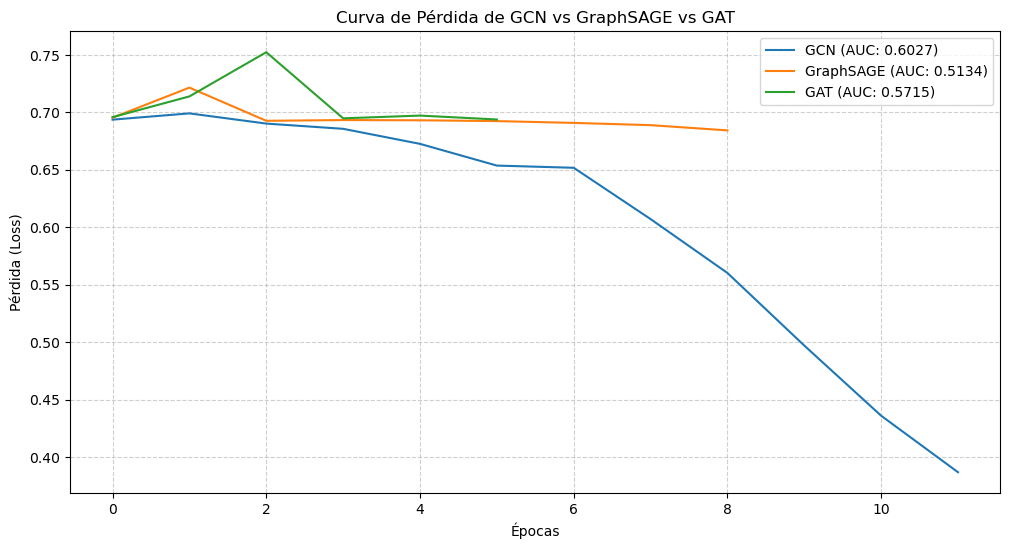

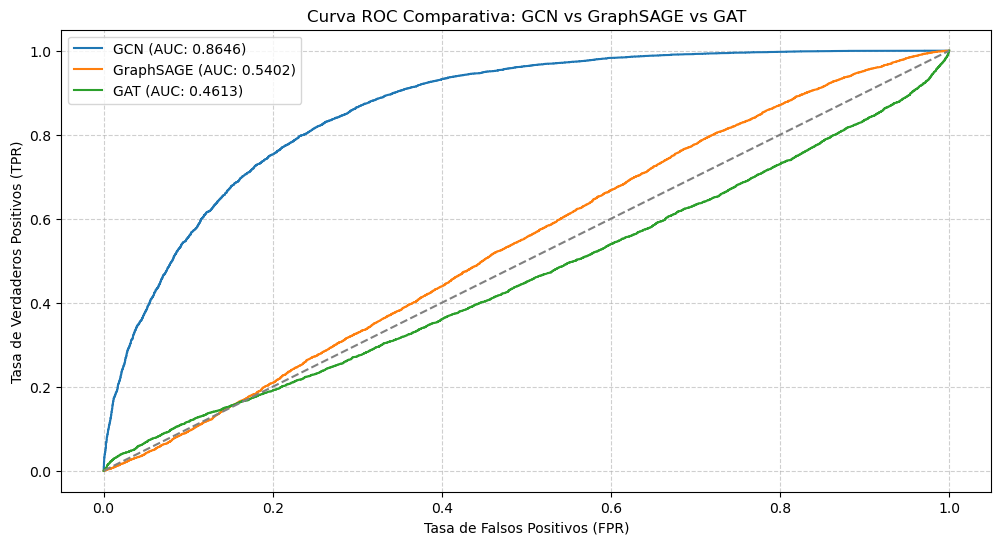

In [49]:
import matplotlib.pyplot as plt

# ✅ Graficar las Curvas de Pérdida
plt.figure(figsize=(12, 6))
for result in results:
    plt.plot(result['losses'], label=f"{result['model']} (AUC: {result['auc']:.4f})")
plt.title("Curva de Pérdida de GCN vs GraphSAGE vs GAT")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# ✅ Graficar las Curvas ROC (Usando los Mejores Modelos Guardados)
plt.figure(figsize=(12, 6))
for result in results:
    model_file = result['model_file']
    model_name = result['model']

    # ✅ Cargar el Mejor Modelo Guardado
    if model_name == "GCN":
        model = GCNLinkPredictor(input_dim, hidden_dim, output_dim)
    elif model_name == "GraphSAGE":
        model = GraphSAGE(input_dim, hidden_dim, output_dim, num_layers=2, aggregator='mean')
    elif model_name == "GAT":
        model = GraphAttentionNetwork(input_dim, hidden_dim, output_dim, num_heads=4)
    
    model.load_state_dict(torch.load(model_file))
    model.eval()
    with torch.no_grad():
        node_embeddings = model(data)
        positive_preds = model.predict_links(node_embeddings, positive_edges)
        negative_preds = model.predict_links(node_embeddings, negative_edges)
        
        preds = torch.cat([positive_preds, negative_preds], dim=0).cpu().numpy()
        true_labels = torch.cat([
            torch.ones(positive_preds.size(0), 1),
            torch.zeros(negative_preds.size(0), 1)
        ]).cpu().numpy()
        
        fpr, tpr, _ = roc_curve(true_labels, preds)
        auc_value = sklearn_auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc_value:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC Comparativa: GCN vs GraphSAGE vs GAT")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

## Generando nuevas carreteras

Vamos a utilizar los modelos entrenados (GCN, GraphSAGE y GAT) para predecir nuevos enlaces (carreteras) que podrían ser óptimos para crear en la red vial.

**¿Qué vamos a hacer?**

1. Identificar pares de nodos que no están conectados actualmente (enlaces negativos).

2. Utilizar los modelos entrenados para predecir la probabilidad de conexión entre estos nodos.

3. Mostrar los 10 mejores enlaces sugeridos para crear (nuevas carreteras).



#### Paso 1: Identificar Pares de Nodos Sin Conexión

In [50]:
import random

# ✅ Obtenemos todos los nodos del subgrafo
all_nodes = list(reindexed_subgraph.nodes())
num_nodes = len(all_nodes)

# ✅ Generamos una lista de pares de nodos sin conexión (enlaces negativos)
potential_new_edges = []

while len(potential_new_edges) < 1000:  # Generamos 1000 pares de nodos candidatos
    n1, n2 = random.sample(all_nodes, 2)
    if not reindexed_subgraph.has_edge(n1, n2) and not reindexed_subgraph.has_edge(n2, n1):
        potential_new_edges.append((n1, n2))

print(f"\n✅ Pares de Nodos Sin Conexión Generados: {len(potential_new_edges)}")



✅ Pares de Nodos Sin Conexión Generados: 1000


#### Paso 2: Definir una Función para Realizar Predicciones de Enlaces

In [51]:
def predict_new_links(model, model_name, edge_candidates, top_k=10):
    model.eval()
    with torch.no_grad():
        node_embeddings = model(data)
        edge_candidates_tensor = torch.tensor(edge_candidates).t().to(torch.long)
        
        # ✅ Realizar las predicciones de enlaces
        link_preds = model.predict_links(node_embeddings, edge_candidates_tensor).cpu().numpy().flatten()
    
    # ✅ Ordenar los enlaces según su probabilidad (mayor a menor)
    sorted_indices = link_preds.argsort()[::-1]
    best_edges = [(edge_candidates[i], link_preds[i]) for i in sorted_indices[:top_k]]
    
    print(f"\n✅ Top {top_k} Nuevos Enlaces Sugeridos por {model_name}:")
    for idx, (edge, prob) in enumerate(best_edges):
        print(f"{idx + 1}. {edge} - Probabilidad: {prob:.4f}")
    
    return best_edges


#### Paso 3: Cargar los Mejores Modelos Guardados

In [52]:
import os

MODELS_DIR = os.path.join("..", "models")
os.makedirs(MODELS_DIR, exist_ok=True)

# ✅ Modelos entrenados y guardados
model_files = {
    "GCN": os.path.join(MODELS_DIR, "best_GCN.pt"),
    "GraphSAGE": os.path.join(MODELS_DIR, "best_GraphSAGE.pt"),
    "GAT": os.path.join(MODELS_DIR, "best_GAT.pt")
}

models = {}

for model_name, model_file in model_files.items():
    if model_name == "GCN":
        model = GCNLinkPredictor(input_dim, hidden_dim, output_dim)
    elif model_name == "GraphSAGE":
        model = GraphSAGE(input_dim, hidden_dim, output_dim, num_layers=2, aggregator='mean')
    elif model_name == "GAT":
        model = GraphAttentionNetwork(input_dim, hidden_dim, output_dim, num_heads=4)
    
    model.load_state_dict(torch.load(model_file))
    models[model_name] = model
    print(f"✅ Modelo {model_name} cargado desde {model_file}.")


✅ Modelo GCN cargado desde best_GCN.pt.
✅ Modelo GraphSAGE cargado desde best_GraphSAGE.pt.
✅ Modelo GAT cargado desde best_GAT.pt.


#### Paso 4: Realizar Predicciones de Enlaces con Cada Modelo

In [53]:
# ✅ Realizar predicciones de enlaces para los tres modelos
top_k = 10  # Mostrar los 10 mejores enlaces sugeridos
predicted_links = {}

for model_name, model in models.items():
    print(f"\n🚀 Prediciendo nuevos enlaces con {model_name}...")
    predicted_links[model_name] = predict_new_links(model, model_name, potential_new_edges, top_k=top_k)


🚀 Prediciendo nuevos enlaces con GCN...

✅ Top 10 Nuevos Enlaces Sugeridos por GCN:
1. (1339, 595) - Probabilidad: 0.7952
2. (1974, 1583) - Probabilidad: 0.7748
3. (2645, 223) - Probabilidad: 0.7747
4. (1957, 491) - Probabilidad: 0.7622
5. (494, 1848) - Probabilidad: 0.7479
6. (1106, 1369) - Probabilidad: 0.7469
7. (1197, 1872) - Probabilidad: 0.7451
8. (1843, 927) - Probabilidad: 0.7444
9. (2802, 1049) - Probabilidad: 0.7265
10. (849, 2898) - Probabilidad: 0.7191

🚀 Prediciendo nuevos enlaces con GraphSAGE...

✅ Top 10 Nuevos Enlaces Sugeridos por GraphSAGE:
1. (1192, 1269) - Probabilidad: 0.5167
2. (2341, 146) - Probabilidad: 0.5165
3. (2495, 2098) - Probabilidad: 0.5165
4. (1395, 679) - Probabilidad: 0.5164
5. (2132, 300) - Probabilidad: 0.5164
6. (502, 132) - Probabilidad: 0.5162
7. (1033, 1852) - Probabilidad: 0.5162
8. (757, 1317) - Probabilidad: 0.5162
9. (1399, 300) - Probabilidad: 0.5161
10. (1312, 307) - Probabilidad: 0.5161

🚀 Prediciendo nuevos enlaces con GAT...

✅ Top 10

**Qué hemos hecho aquí?**

- Identificamos pares de nodos que no están conectados actualmente (enlaces negativos).

- Utilizamos los modelos entrenados (GCN, GraphSAGE y GAT) para predecir la probabilidad de conexión entre estos nodos.

- Mostramos los 10 mejores enlaces sugeridos para cada modelo:

    -Los enlaces con mayor probabilidad son los mejores candidatos para nuevas carreteras.

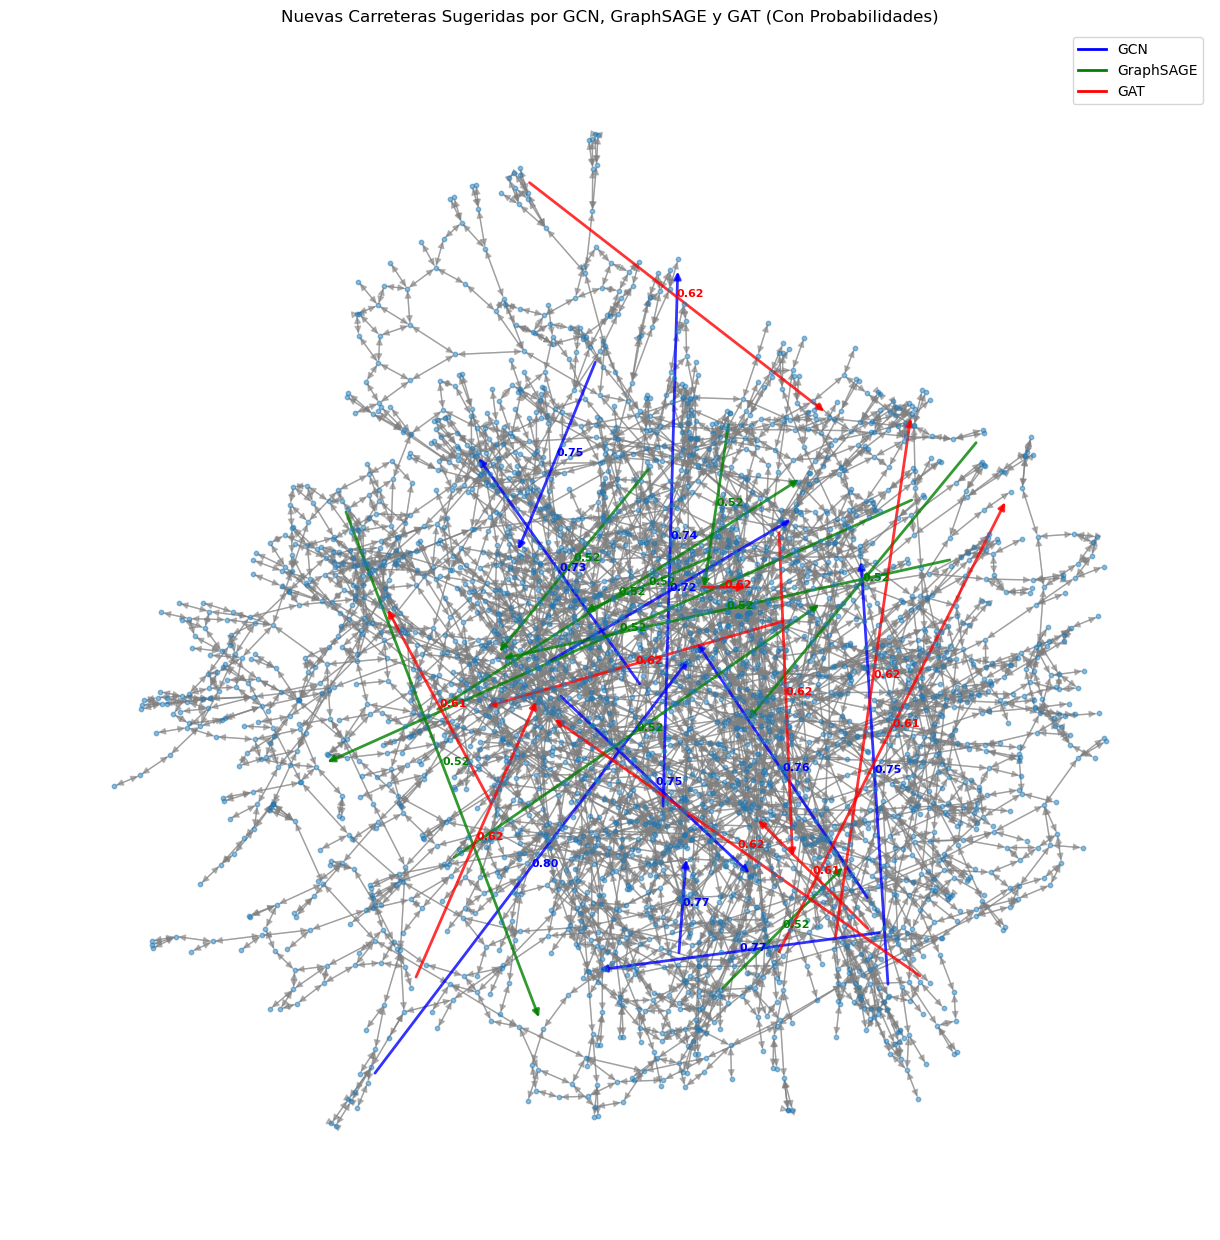

In [56]:
import matplotlib.pyplot as plt
import networkx as nx

# ✅ Crear una copia del subgrafo original para visualización
visual_graph = reindexed_subgraph.copy()

# ✅ Definir colores para las predicciones de cada modelo
model_colors = {
    "GCN": "blue",
    "GraphSAGE": "green",
    "GAT": "red"
}

# ✅ Dibujar el grafo base
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(visual_graph, seed=42)  # Layout para la visualización
nx.draw(visual_graph, pos, node_size=10, edge_color="gray", alpha=0.5, with_labels=False)

# ✅ Dibujar los enlaces predichos por cada modelo (con diferente color y probabilidad)
for model_name, links in predicted_links.items():
    for (node_pair, prob) in links:
        n1, n2 = node_pair
        
        # ✅ Dibujar el enlace con el color del modelo
        nx.draw_networkx_edges(
            visual_graph,
            pos,
            edgelist=[(n1, n2)],
            width=2,
            edge_color=model_colors[model_name],
            alpha=0.8
        )
        
        # ✅ Mostrar la probabilidad directamente en el enlace
        x_pos = (pos[n1][0] + pos[n2][0]) / 2
        y_pos = (pos[n1][1] + pos[n2][1]) / 2
        plt.text(x_pos, y_pos, f"{prob:.2f}", fontsize=8, color=model_colors[model_name], fontweight="bold")

# ✅ Añadir leyenda y título
plt.title("Nuevas Carreteras Sugeridas por GCN, GraphSAGE y GAT (Con Probabilidades)")
plt.legend(handles=[
    plt.Line2D([0], [0], color="blue", lw=2, label="GCN"),
    plt.Line2D([0], [0], color="green", lw=2, label="GraphSAGE"),
    plt.Line2D([0], [0], color="red", lw=2, label="GAT")
])
plt.show()